# Data, general overview

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
transactions = pd.read_csv('onlinefraud.csv')

transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
transactions.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
transactions.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
transactions.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [6]:
transactions.shape

(6362620, 11)

### Amount distributions

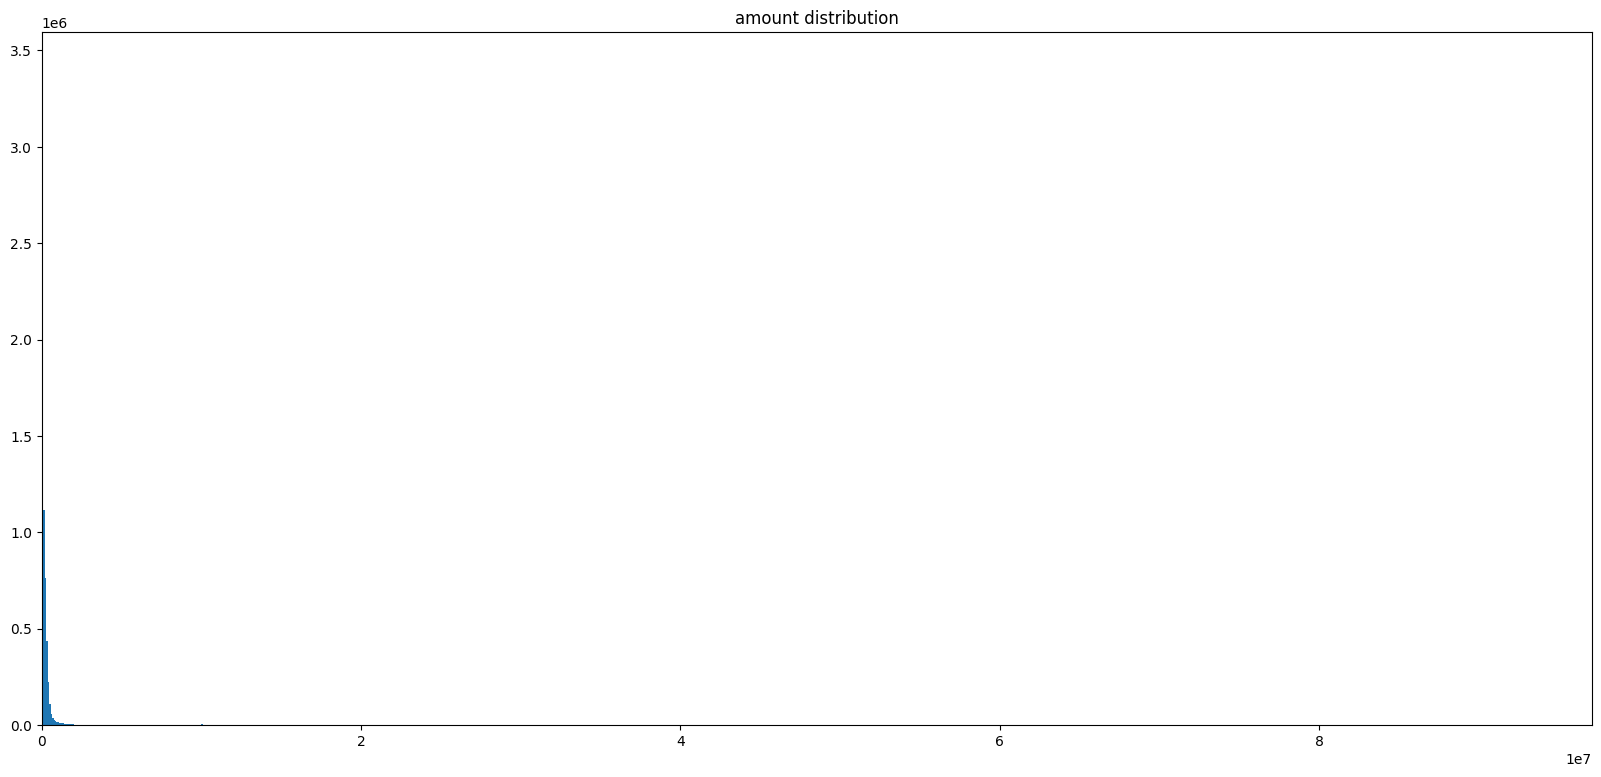

In [7]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20, 9)


def plot_hist(column, data=transactions, xmax=None, xmin=0, bins=1000):
    index = data.index
    if xmax is not None:
        index = data[column] <= xmax
    data.loc[index, column].hist(bins=bins)
    plt.title(f'{column} distribution')
    plt.xlim(xmax=xmax, xmin=xmin)
    plt.grid()
    plt.show()


plot_hist('amount')

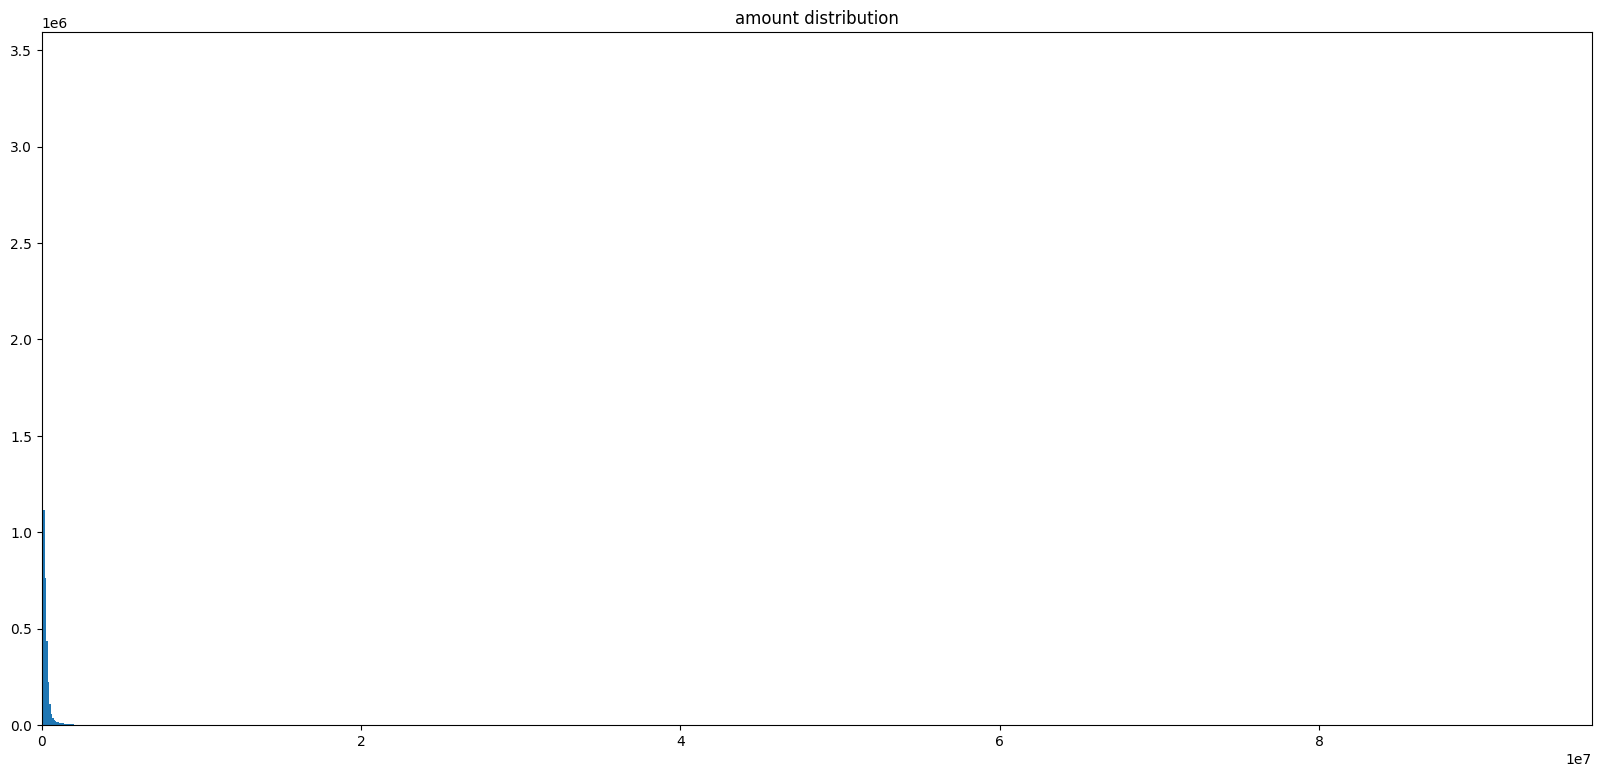

In [8]:
plot_hist('amount', transactions[transactions['isFraud'] == 0])

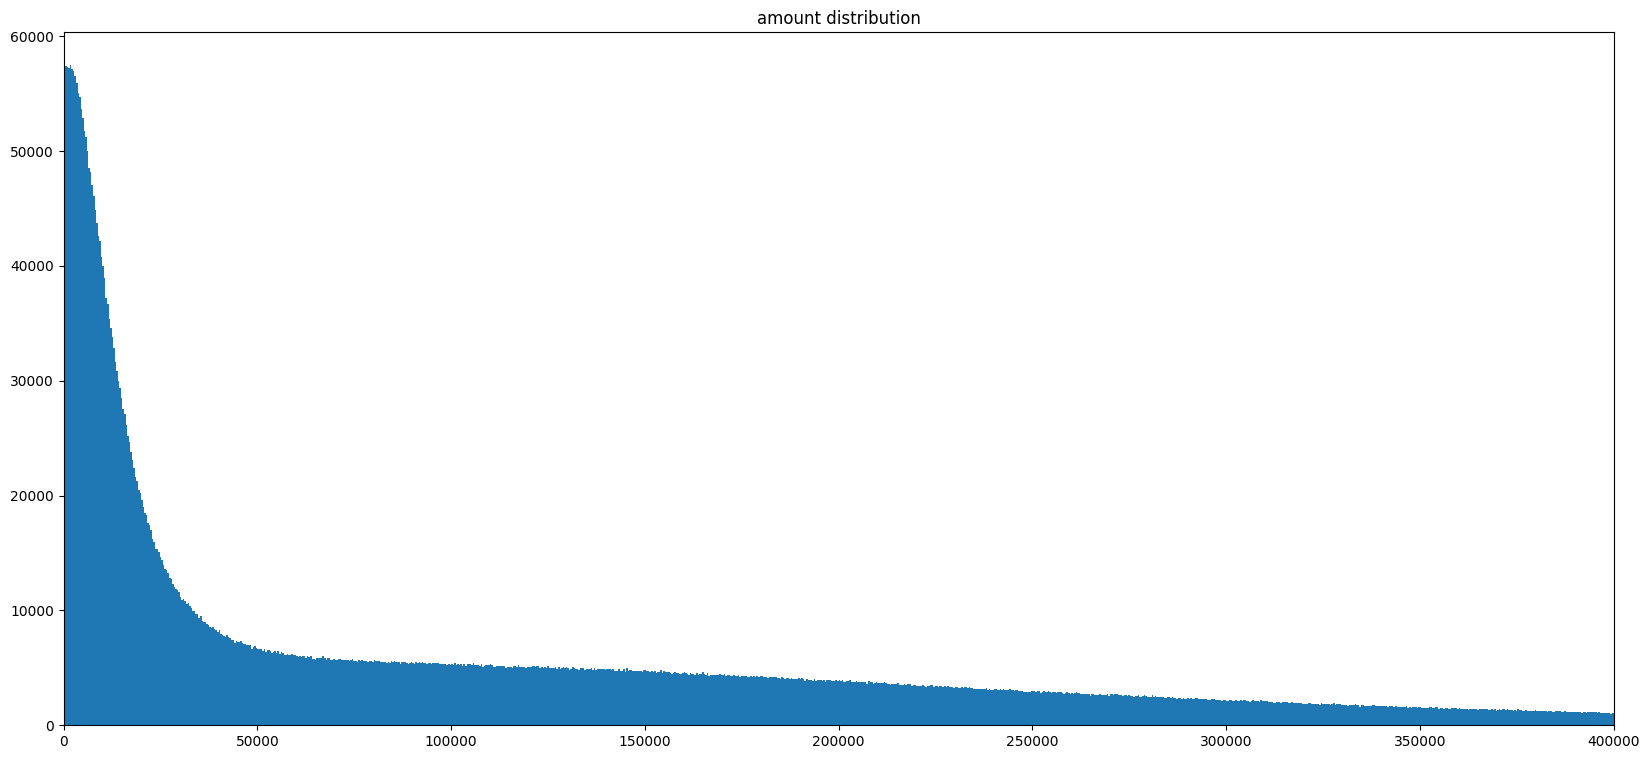

In [9]:
plot_hist('amount', xmax=4e5)

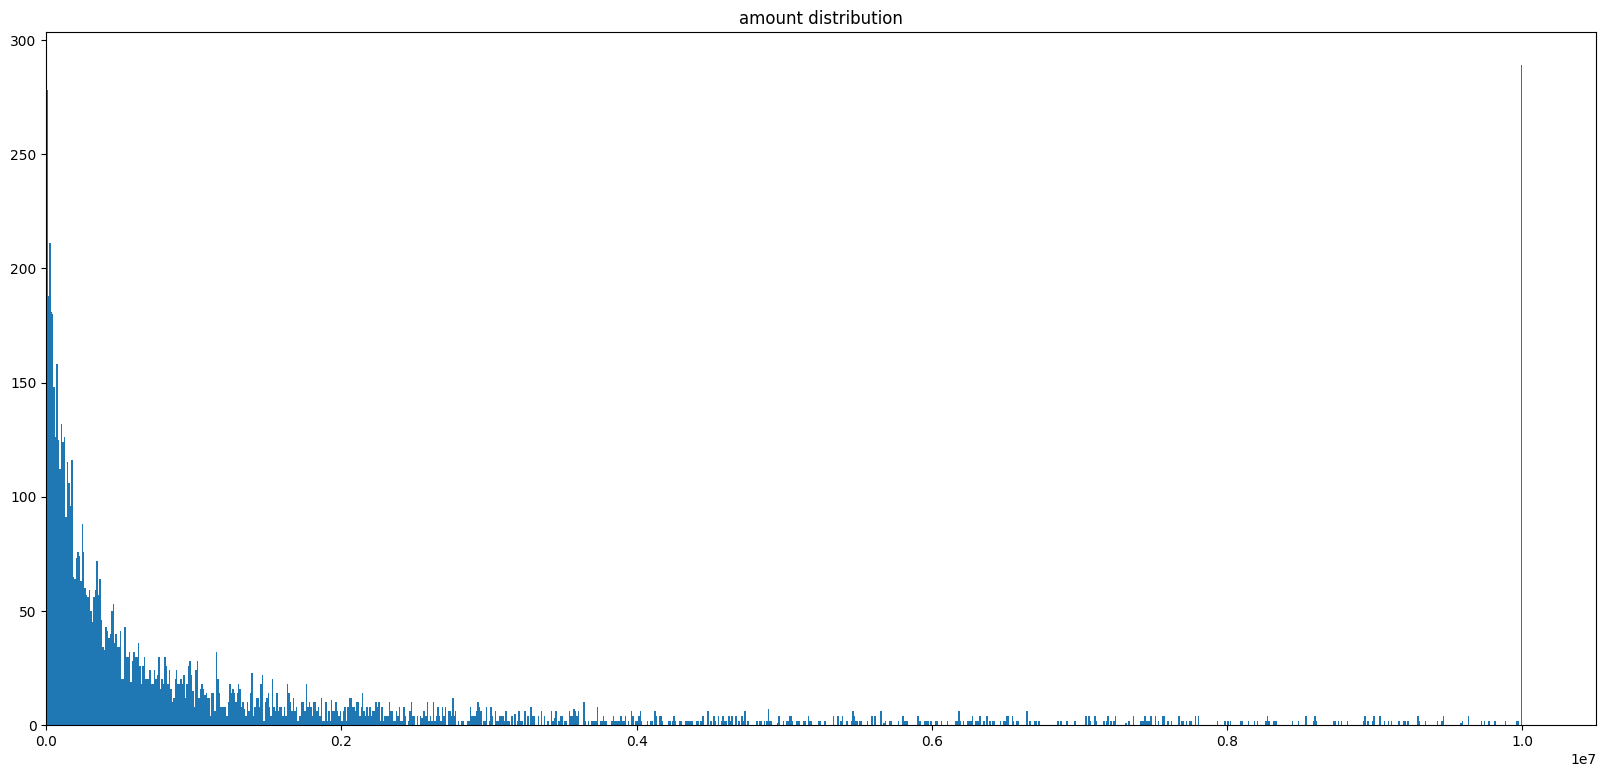

In [10]:
plot_hist(
    column='amount',
    data=transactions[transactions['isFraud'] == 1]
)

As we can see, a lot of fraud transactions has amount near 10^7, while other fraud transactions have the same distribution with non fraud

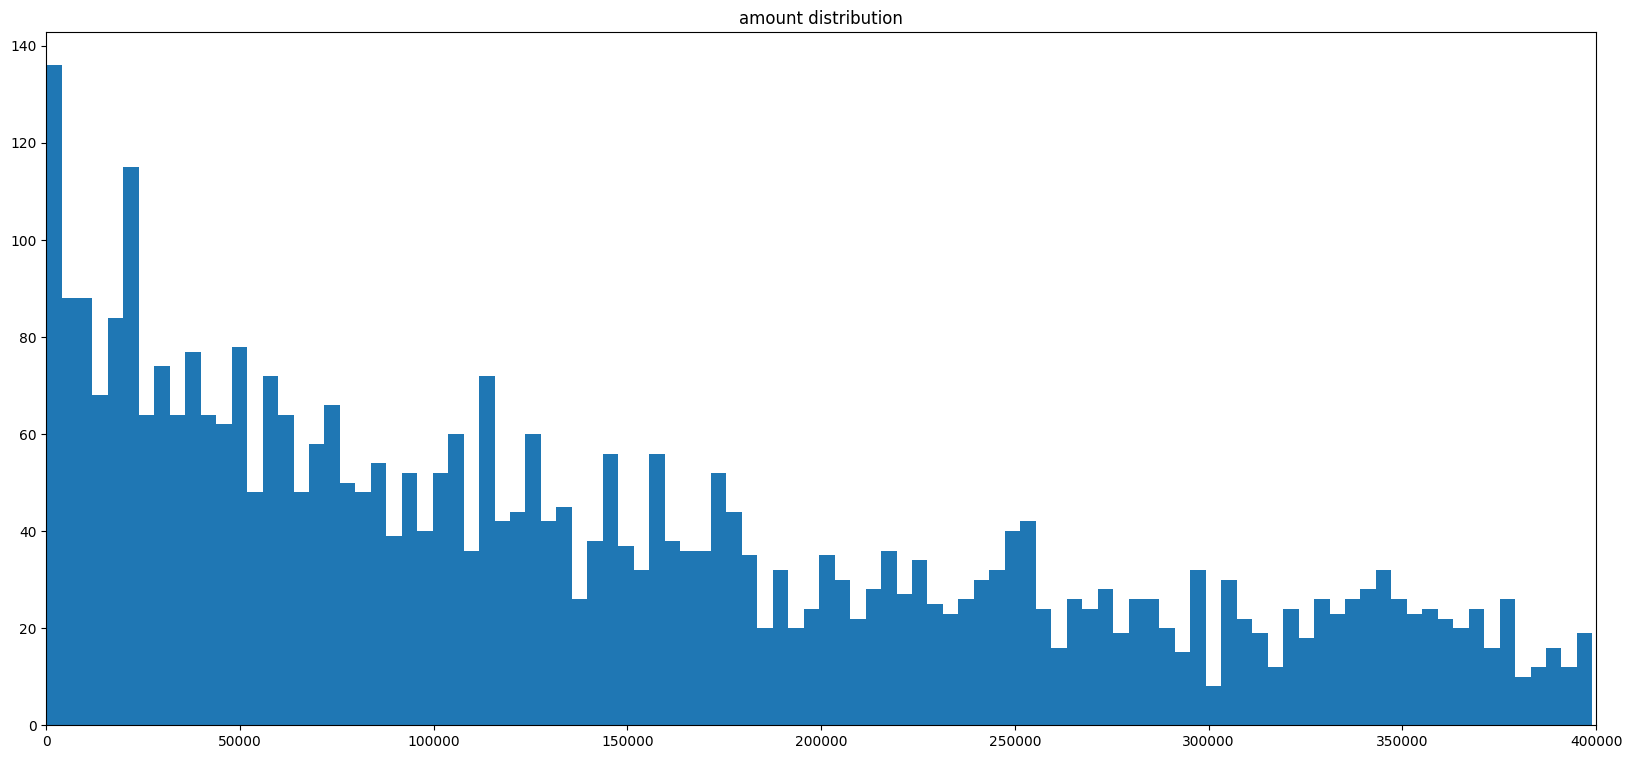

In [11]:
plot_hist(
    column='amount',
    data=transactions[transactions['isFraud'] == 1],
    xmax=4e5,
    bins=100
)

Fraud transactions have not so huge pike near zero amount.

### Step check

In [12]:
transactions['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

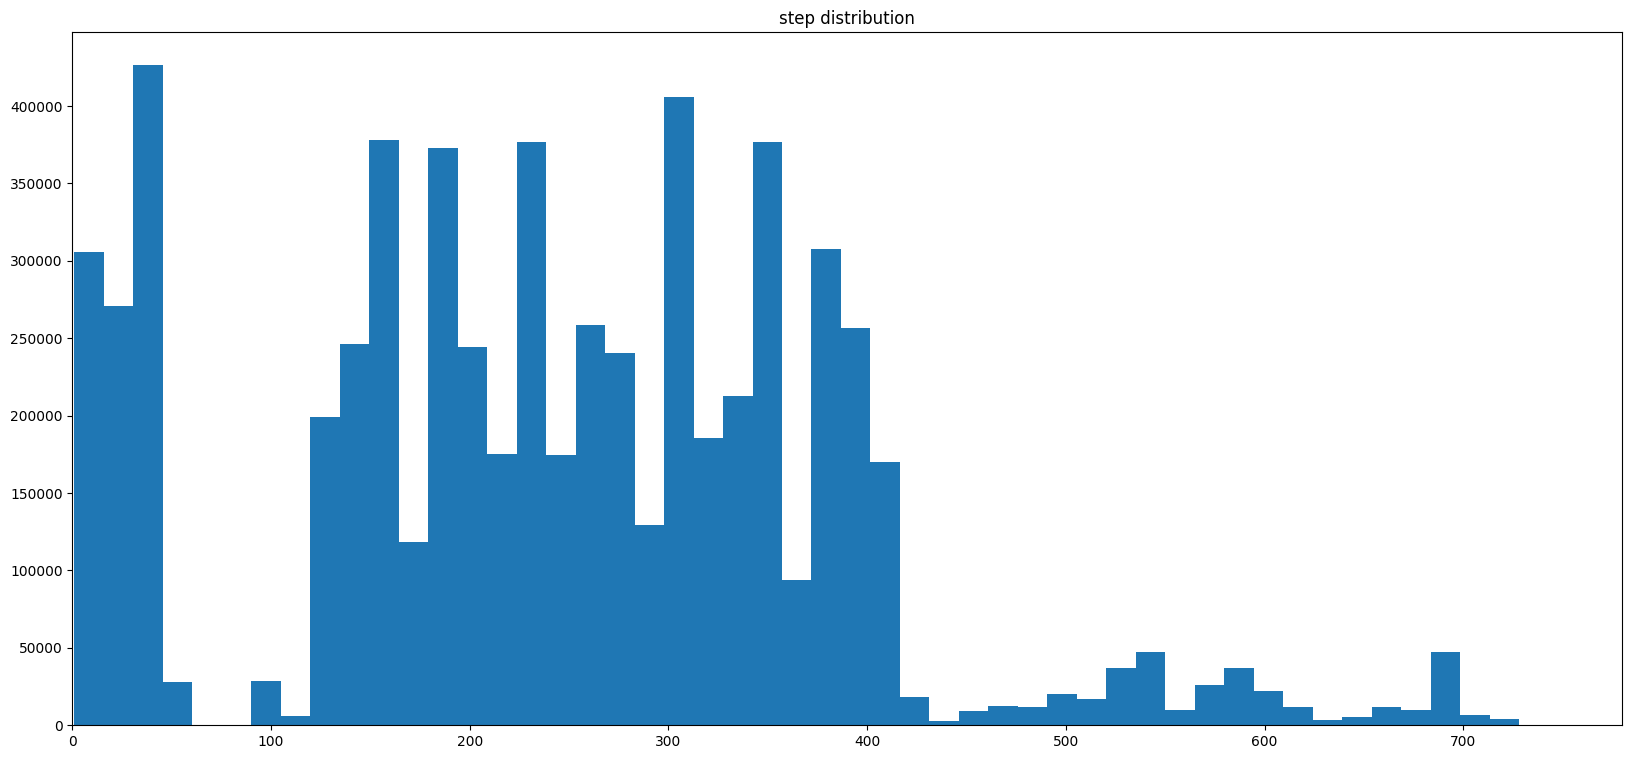

In [13]:
plot_hist('step', bins=50)

# Discrepancies

### Overview

In [14]:
transactions[transactions['newbalanceOrig'] + transactions['amount'] != transactions['oldbalanceOrg']].groupby('type')['amount'].count()

type
CASH_IN     1399284
CASH_OUT    2009391
DEBIT         13671
PAYMENT     1279083
TRANSFER     511040
Name: amount, dtype: int64

In [15]:
transactions.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1541646,154,PAYMENT,3133.35,C503764687,64825.46,61692.12,M1069159678,0.00,0.00,0,0
2285382,187,CASH_OUT,244457.82,C98472528,196.00,0.00,C2110838140,6020996.05,6265453.87,0,0
4692147,331,CASH_OUT,235035.97,C485820824,0.00,0.00,C1199412465,503293.38,738329.35,0,0
2905354,228,CASH_OUT,161458.50,C1358068485,141507.81,0.00,C1627522515,511089.93,937280.74,0,0
438302,18,PAYMENT,17544.60,C840489328,0.00,0.00,M1682808579,0.00,0.00,0,0


### Add discrepancy columns

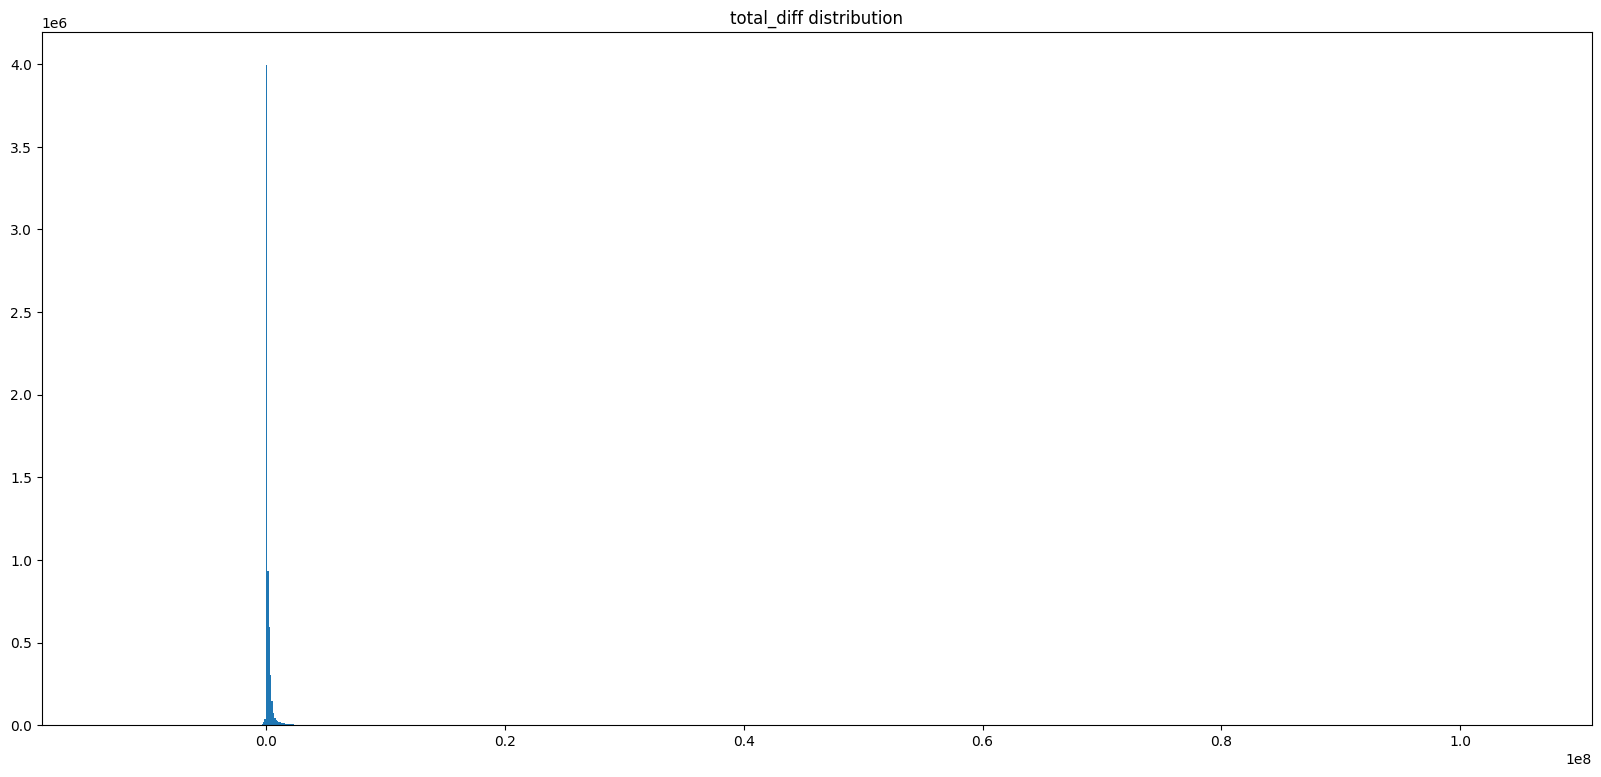

In [16]:
transactions['actual_amount_spent'] = transactions['oldbalanceOrg'] - transactions['newbalanceOrig']
transactions['actual_amount_received'] = transactions['newbalanceDest'] - transactions['oldbalanceDest']

transactions['diff_spent'] = transactions['actual_amount_spent'] - transactions['amount']
transactions['diff_received'] = transactions['actual_amount_received'] - transactions['amount']
transactions['total_diff'] = transactions['actual_amount_received'] - transactions['actual_amount_spent']

plot_hist('total_diff', transactions, xmin=None)

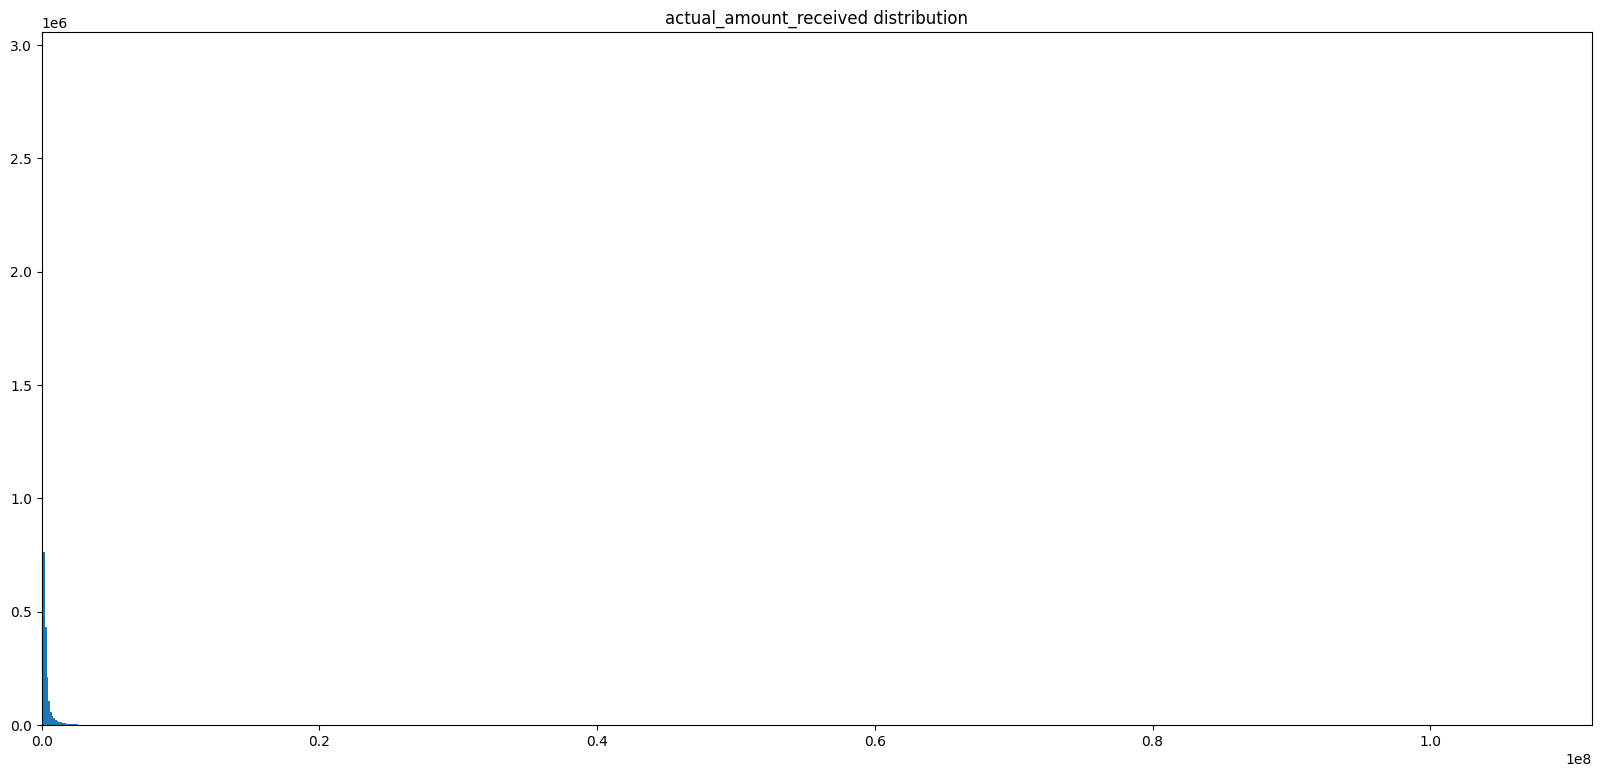

In [17]:
plot_hist('actual_amount_received')

We expect diff_spent, diff_received and total_diff to be equal to zero

In [18]:
transactions[['diff_spent', 'diff_received', 'total_diff']].describe()

,diff_spent,diff_received,total_diff
count,6.362620e+06,6.362620e+06,6.362620e+06
mean,-2.010925e+05,-5.556717e+04,1.455253e+05
std,6.066505e+05,4.415288e+05,8.012558e+05
min,-9.244552e+07,-1.319123e+07,-1.293042e+07
25%,-2.496411e+05,-2.935305e+04,-1.000000e-02
50%,-6.867726e+04,-3.500490e+03,1.164153e-10
75%,-2.954230e+03,0.000000e+00,1.435285e+05
max,1.000000e-02,7.588573e+07,1.051376e+08


Values are not equal to zero, let's investigate it. Assumption is that there are "debt" transactions, and they spoil statistics. The other assumtion is that discrepancy vary from type of transaction.

In [19]:
from IPython.display import display


def display_discrepancies(column=None, data=transactions):
    if column is not None:
        display(column)
        for column_value in data[column].unique():
            display(column_value)
            description = data.loc[data[column] == column_value, ['diff_spent', 'diff_received', 'total_diff', 'amount']].describe().round(2)
            display(description)
    else:
        description = data[['diff_spent', 'diff_received', 'total_diff', 'amount']].describe().round(2)
        display(description)

Transactions without "debt"

In [20]:
transactions[transactions['amount'] <= transactions['oldbalanceOrg']].shape

(2283540, 16)

In [21]:
display_discrepancies(
    data=transactions[transactions['amount'] <= transactions['oldbalanceOrg']]
)

,diff_spent,diff_received,total_diff,amount
count,2283540.00,2283540.00,2283540.00,2283540.00
mean,-123400.08,-120472.63,2927.46,83300.02
std,216442.67,303521.78,223699.22,198673.72
min,-10000000.00,-13191233.98,-12930418.44,0.00
25%,-182883.00,-176007.50,-7840.20,7250.38
50%,-0.00,-14659.76,-0.01,23544.44
75%,0.00,-3352.42,0.00,117613.70
max,0.01,57787800.93,57787800.93,10000000.00


Still bad, but a bit closer to zero. Let's have a look at the same data separately for each type of transaction.

In [22]:
display_discrepancies(
    column='type',
    data=transactions[transactions['amount'] <= transactions['oldbalanceOrg']]
)

'type'

'PAYMENT'

,diff_spent,diff_received,total_diff,amount
count,1050371.00,1050371.00,1050371.00,1050371.00
mean,-0.00,-10873.66,-10873.66,10873.66
std,0.00,10518.75,10518.75,10518.75
min,-0.01,-185122.53,-185122.54,0.02
25%,-0.00,-14655.60,-14655.60,3629.06
50%,0.00,-7943.14,-7943.14,7943.14
75%,0.00,-3629.06,-3629.06,14655.60
max,0.01,-0.02,-0.02,185122.53


'TRANSFER'

,diff_spent,diff_received,total_diff,amount
count,25397.00,25397.00,25397.00,25397.00
mean,-3069.44,-222532.58,-219463.13,361411.01
std,149734.98,1134691.88,1125364.40,1100383.92
min,-10000000.00,-10000000.00,-10000000.00,3.32
25%,0.00,-0.01,-0.01,34429.49
50%,0.00,0.00,0.00,102644.54
75%,0.00,0.00,0.00,252667.75
max,0.01,13202597.70,13202597.70,10000000.00


'CASH_OUT'

,diff_spent,diff_received,total_diff,amount
count,256378.00,256378.00,256378.00,256378.00
mean,-0.68,16423.44,16424.12,111690.38
std,291.90,292548.20,292547.74,359714.24
min,-144659.77,-9977761.06,-9977761.06,0.00
25%,0.00,-0.00,-0.00,23079.44
50%,0.00,0.00,0.00,62042.52
75%,0.00,0.00,0.00,131868.46
max,0.01,57787800.93,57787800.93,10000000.00


'DEBIT'

,diff_spent,diff_received,total_diff,amount
count,29646.00,29646.00,29646.00,29646.00
mean,0.00,13398.14,13398.14,4211.55
std,0.00,221947.16,221947.16,6970.51
min,-0.01,-1387238.17,-1387238.17,0.87
25%,-0.00,-0.00,-0.00,1357.79
50%,0.00,0.00,0.00,2832.37
75%,0.00,0.00,0.00,5006.77
max,0.01,16742827.52,16742827.52,408672.22


'CASH_IN'

,diff_spent,diff_received,total_diff,amount
count,921748.00,921748.00,921748.00,921748.00
mean,-305626.81,-284935.61,20691.19,152817.23
std,244456.52,347031.34,248223.60,122231.59
min,-3830535.80,-13191233.98,-12930418.44,0.04
25%,-438025.96,-432383.22,-0.00,57666.91
50%,-251302.49,-241778.01,0.00,125654.90
75%,-115330.00,-103112.22,0.00,219018.37
max,-0.08,54306911.88,54350495.02,1915267.90


Results are much better - we localized problem. The worst type of transactions are cash in and pyment, but in fact we can ignore them, because there is not fraud transactions among these types. We will proof it with data below.

<AxesSubplot: >

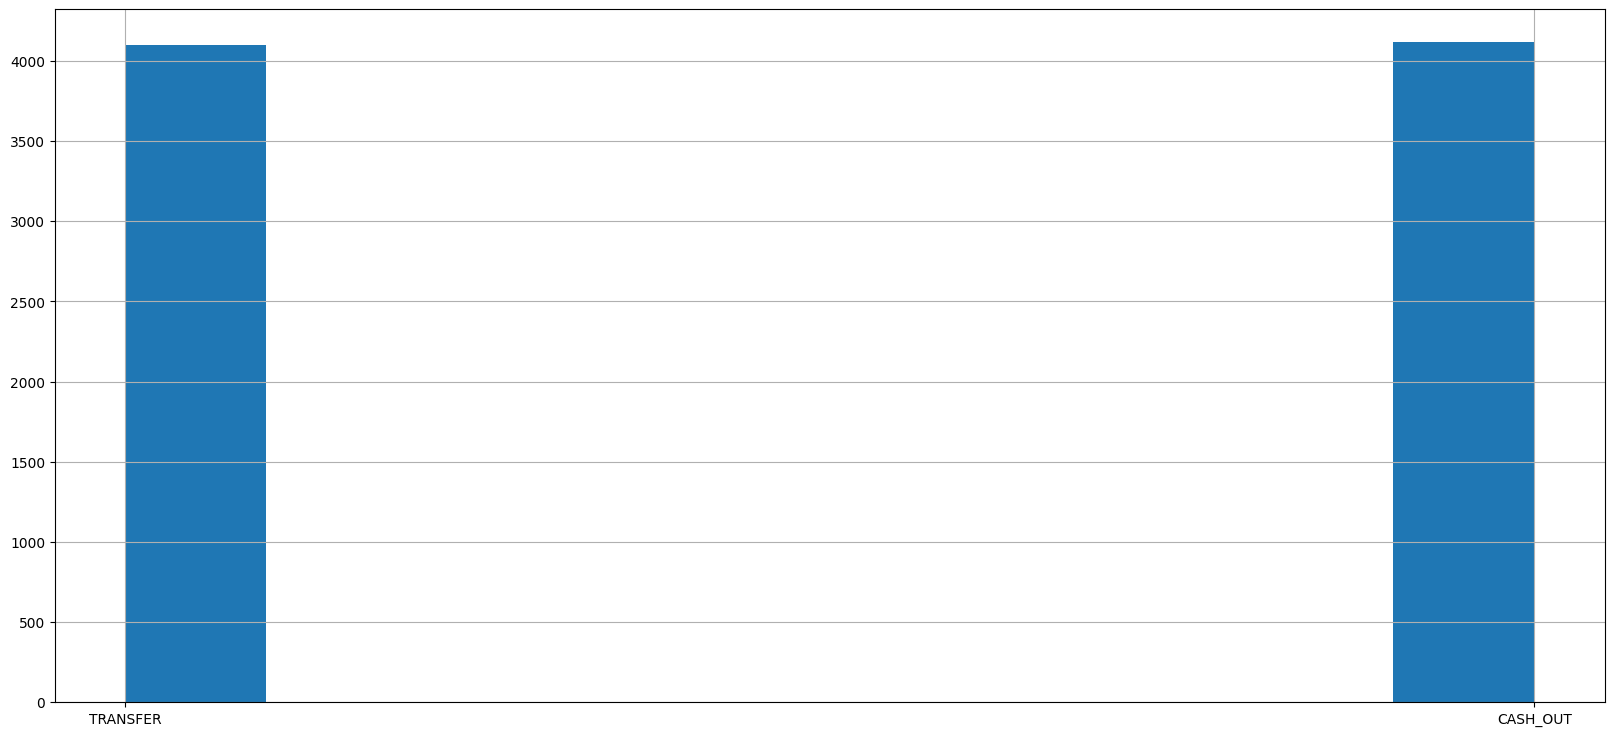

In [23]:
transactions[transactions['isFraud'] == 1]['type'].hist()

Fraud was detected only among transfer and cash out transactions, so we can concentrate on these transactions and ignore other types.

### Discrepancy deep investigation

### Some ideas about reasons of discrepancy
Wrong understanding of process:
* Transfer can be not finished
* Problems in data itself (wrong records)
* Unknown fee
* Attempts to transfer more, than actual balance

Wrong data processing
* Wrong approaches (mistakes in code and methods usage)

In [24]:
def plot_discrepancy_histograms(diff_columns=None, alpha=0, remove_zero=False, plot_actual_amount_spent=False):
    if diff_columns is None:
        diff_columns = ['diff_spent', 'diff_received', 'total_diff']
    diff_columns = ['diff_spent', 'diff_received', 'total_diff']
    for transaction_type in ['TRANSFER', 'CASH_OUT']:
        current_transactions = transactions[(transactions['type'] == transaction_type) & (transactions['amount'] <= transactions['oldbalanceOrg'])]
        current_transactions[diff_columns] = current_transactions[diff_columns].astype(int)
        for column in diff_columns:
            print(f'length before removing tails: {len(current_transactions)}')
            col_value = current_transactions[column]
            top_quantile = col_value.quantile(1 - alpha / 2)
            bottom_quantile = col_value.quantile(alpha / 2)
            index = (col_value >= bottom_quantile) & (col_value <= top_quantile)
            if remove_zero:
                index = index & (col_value != 0)
            col_value = col_value[index]
            print(f'length after removing tails: {len(col_value)}, percent kept: {int(len(col_value) / len(current_transactions) * 100)}%')
            alpha_plot = 1

            if column == 'diff_received' and plot_actual_amount_spent:
                alpha_plot = 0.5
                received_column = 'actual_amount_spent'
                (-current_transactions.loc[index, received_column]).hist(bins=100, label=f'-{received_column}', alpha=alpha_plot)

            col_value.hist(bins=100, label=column, alpha=alpha_plot)
            plt.legend()
            plt.xlim(xmin=bottom_quantile, xmax=top_quantile)
            plt.title(f'{transaction_type}')
            plt.show()

        plt.figure(figsize=(20, 10))
        current_transactions['amount'].hist(bins=100)
        plt.title(f'{transaction_type}: amount')
        plt.show()

length before removing tails: 25397
length after removing tails: 25397, percent kept: 100%


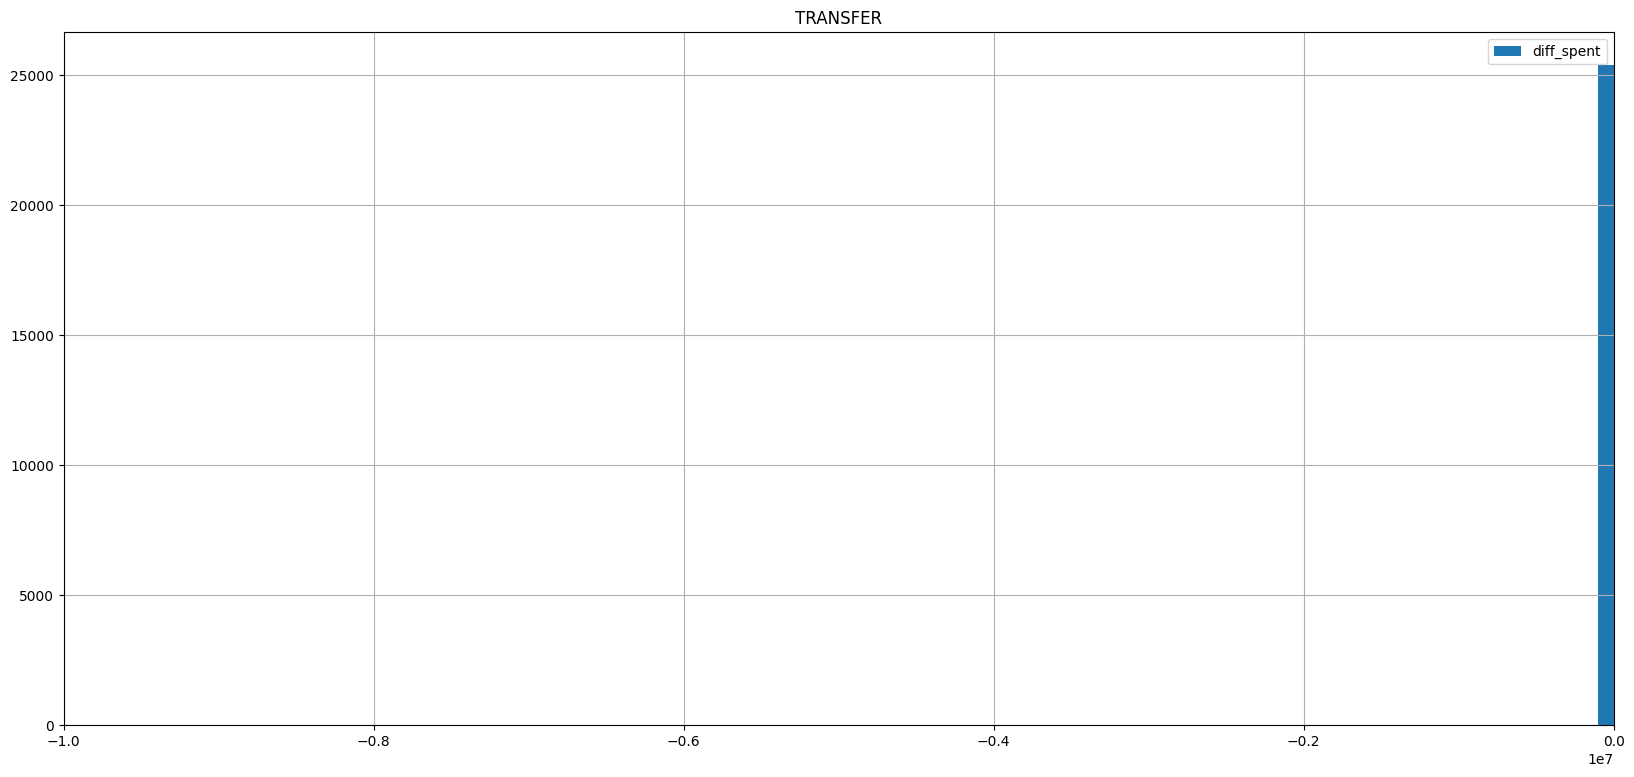

length before removing tails: 25397
length after removing tails: 25397, percent kept: 100%


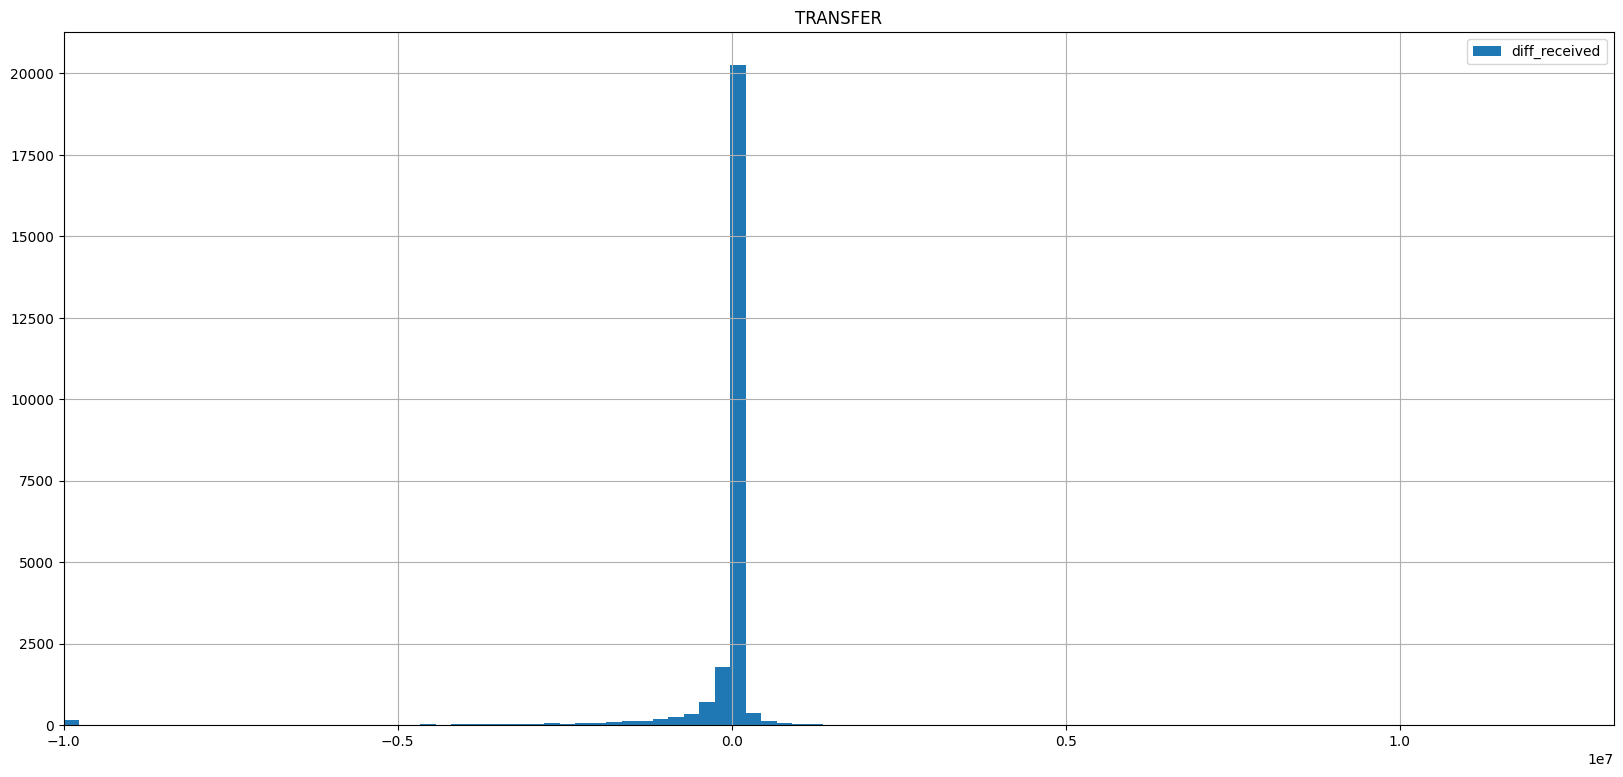

length before removing tails: 25397
length after removing tails: 25397, percent kept: 100%


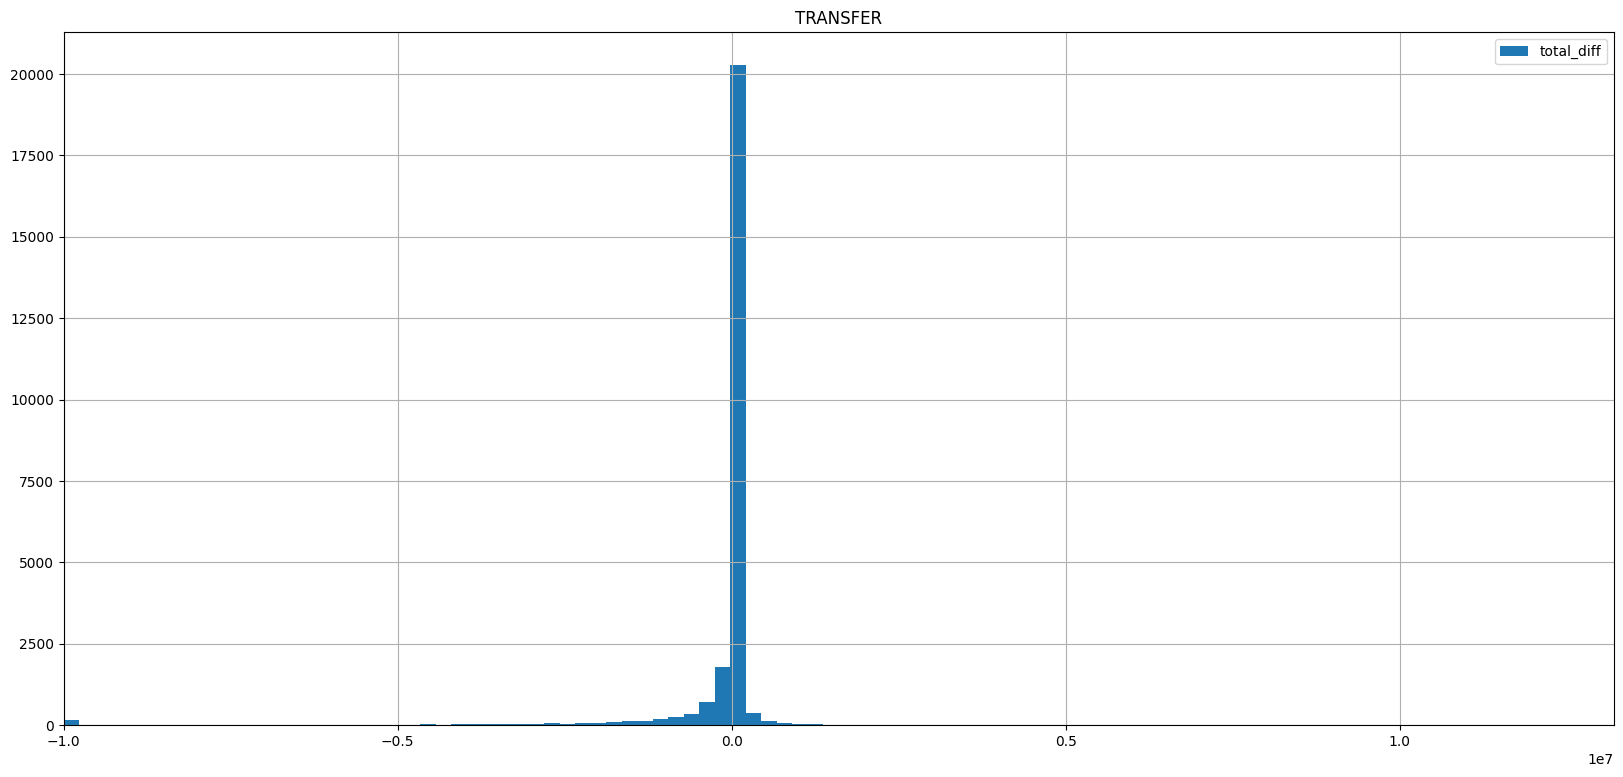

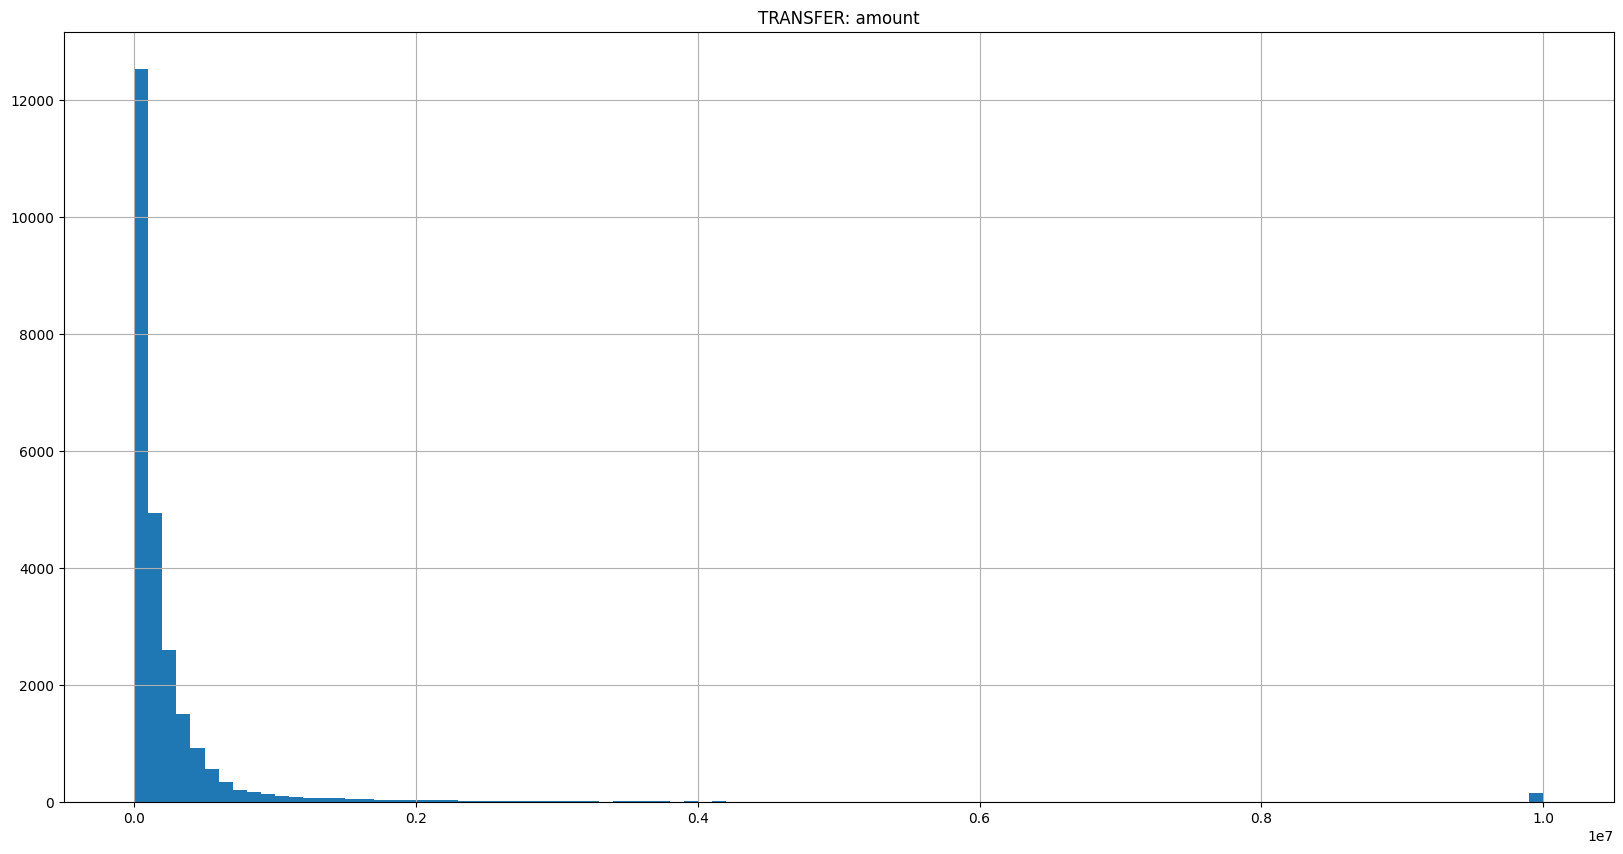

length before removing tails: 256378
length after removing tails: 256378, percent kept: 100%


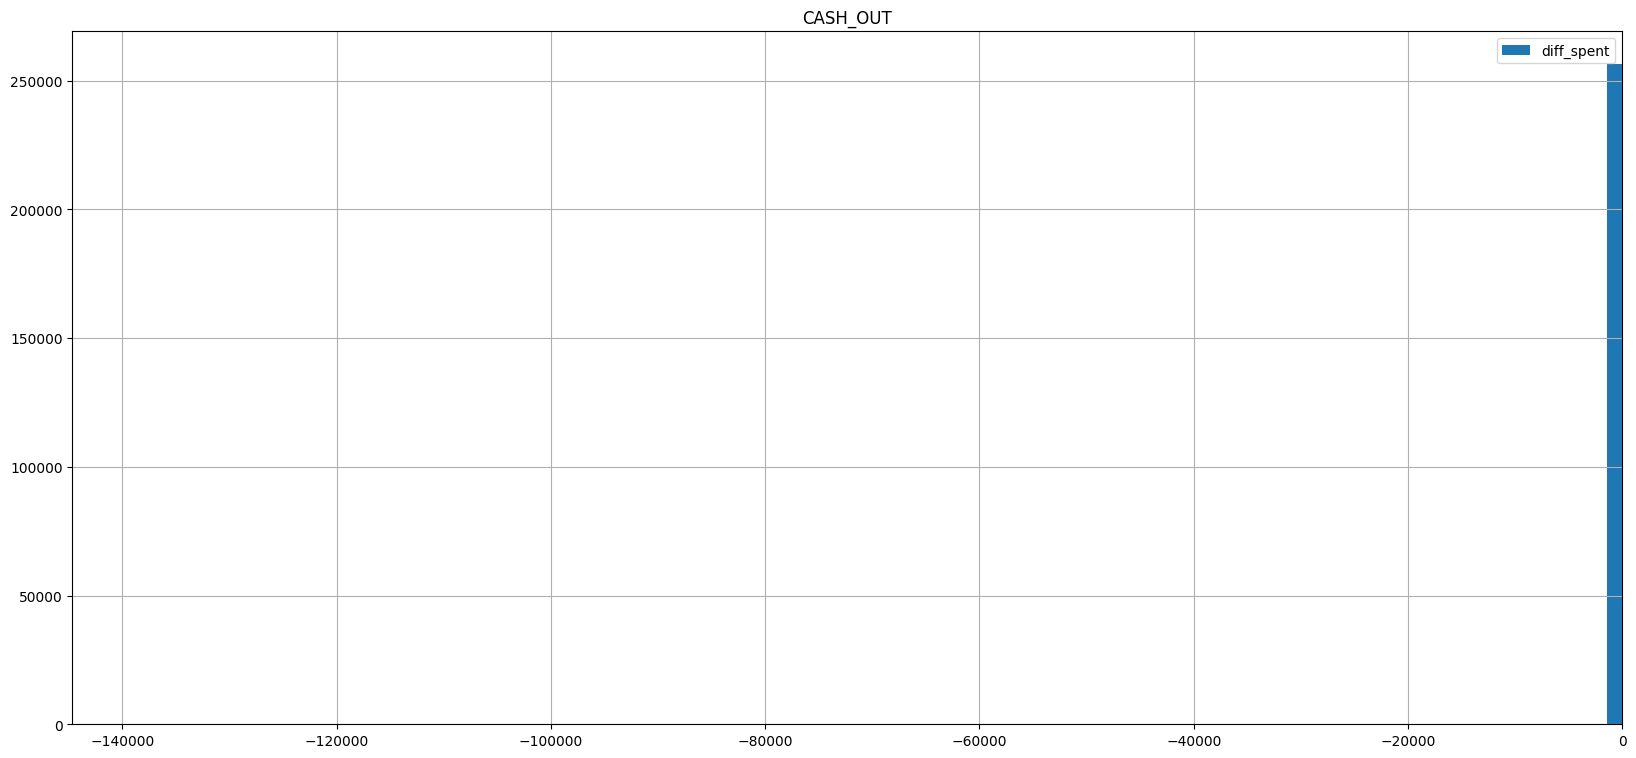

length before removing tails: 256378
length after removing tails: 256378, percent kept: 100%


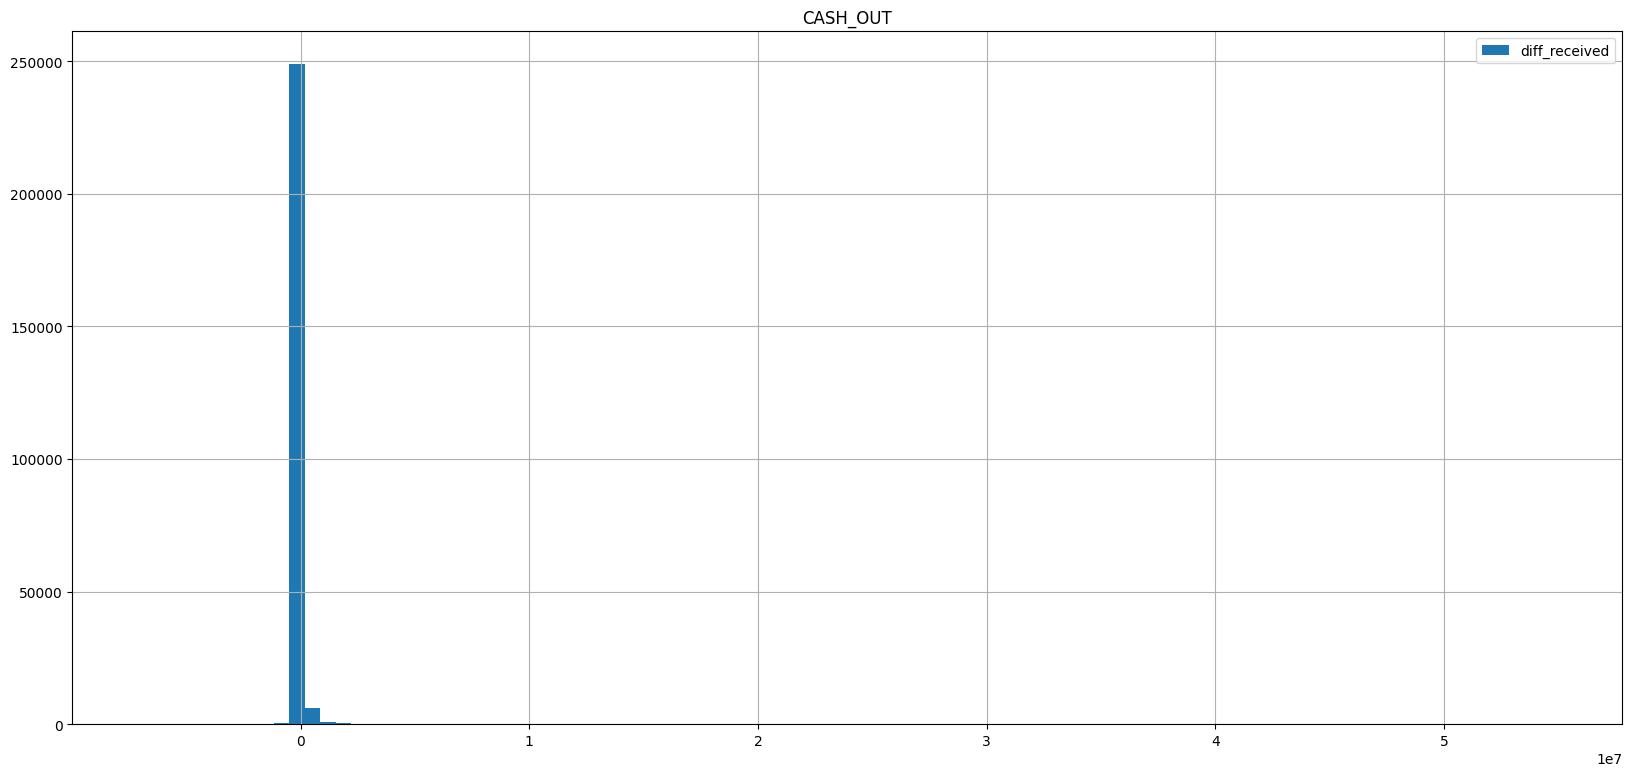

length before removing tails: 256378
length after removing tails: 256378, percent kept: 100%


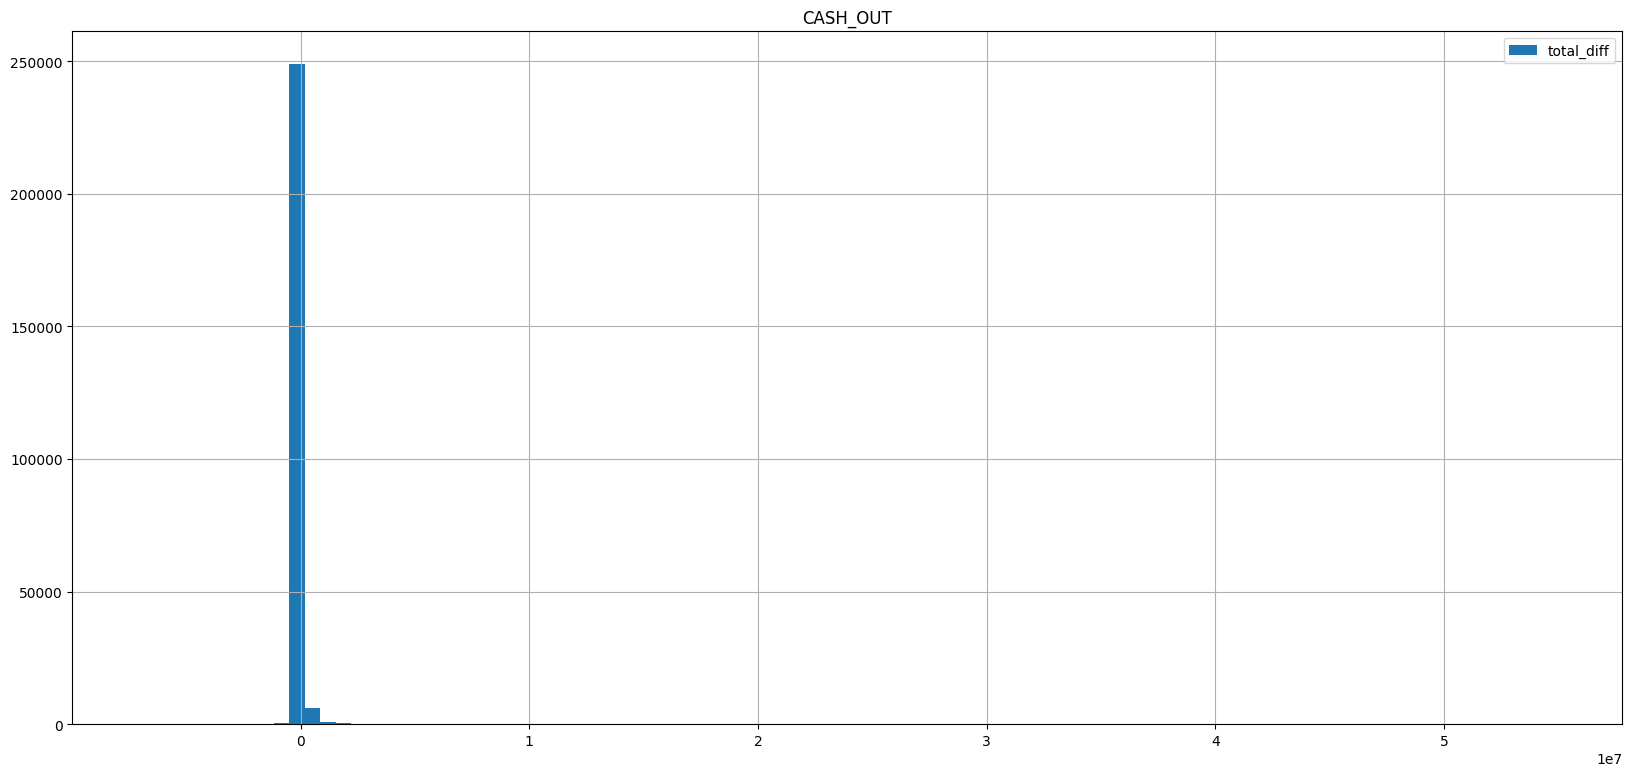

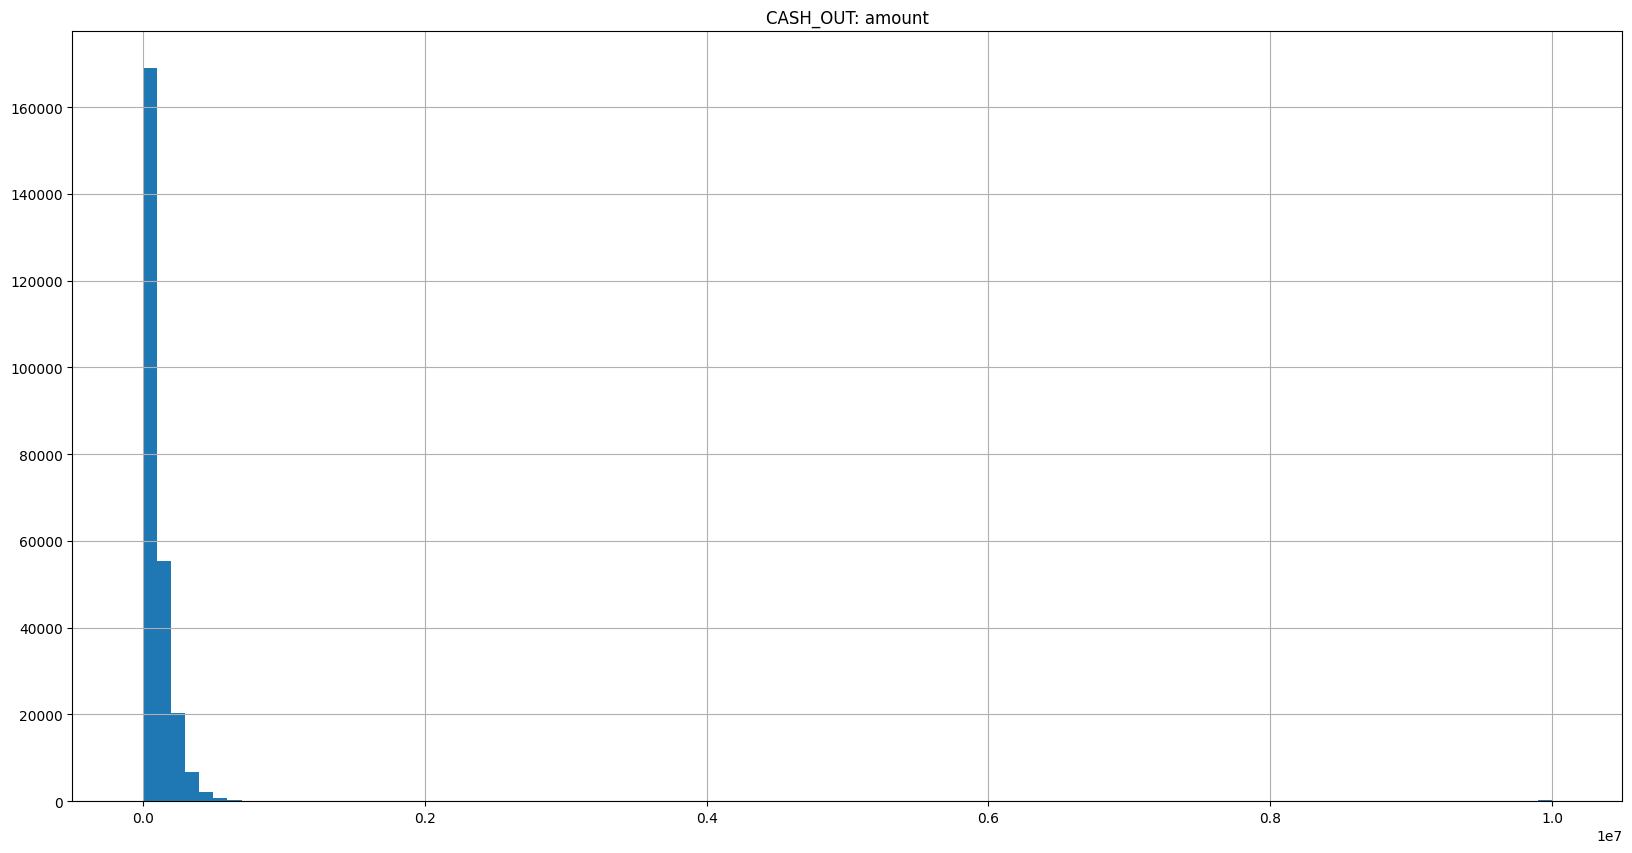

In [25]:
plot_discrepancy_histograms()

All distributions have a huge pike near zero, but we can not see full picture, let's clean out top 2.5% smallest and biggest values.

length before removing tails: 25397
length after removing tails: 25380, percent kept: 99%


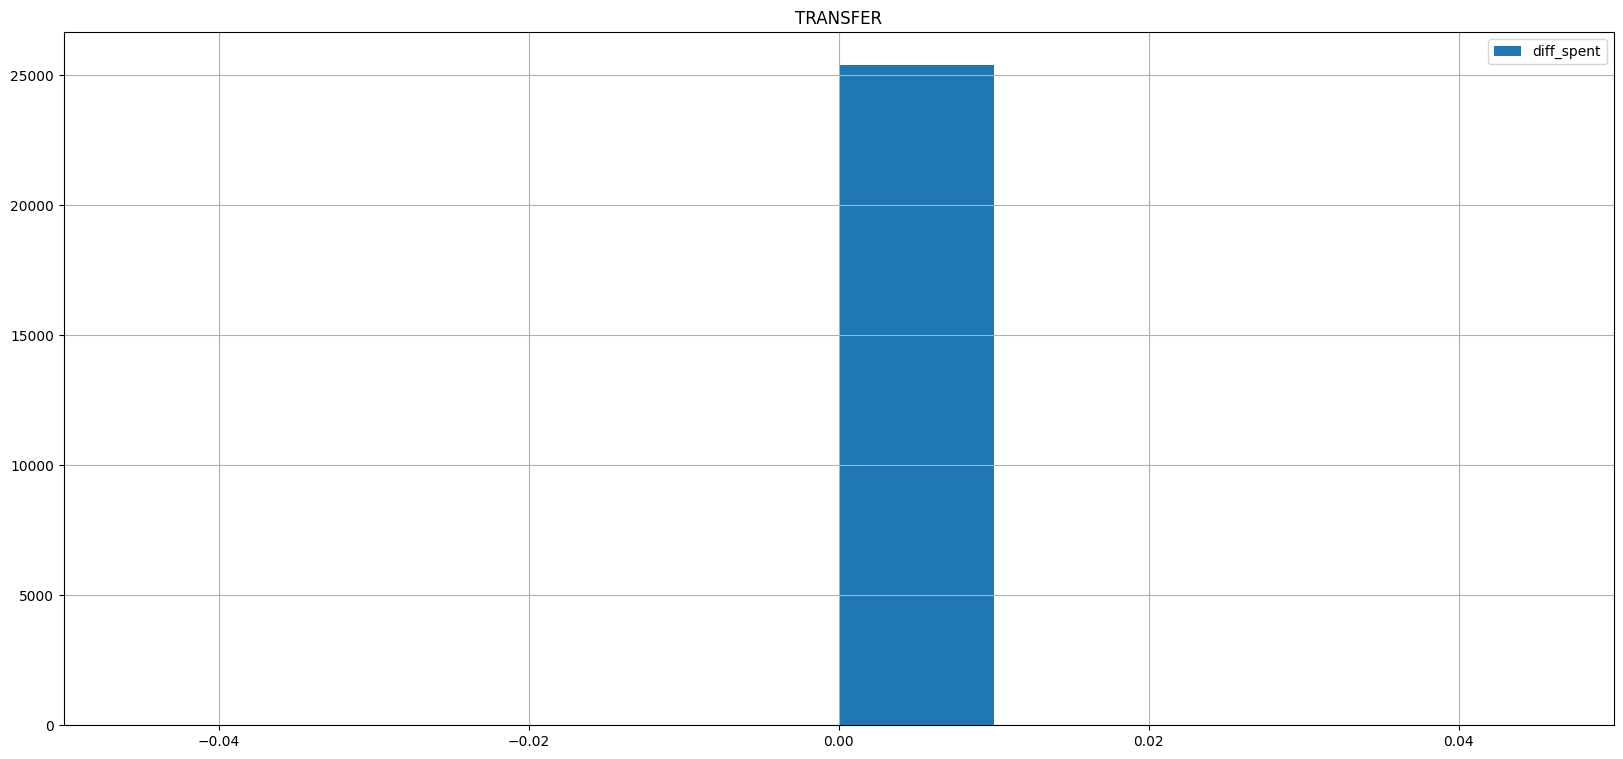

length before removing tails: 25397
length after removing tails: 24127, percent kept: 94%


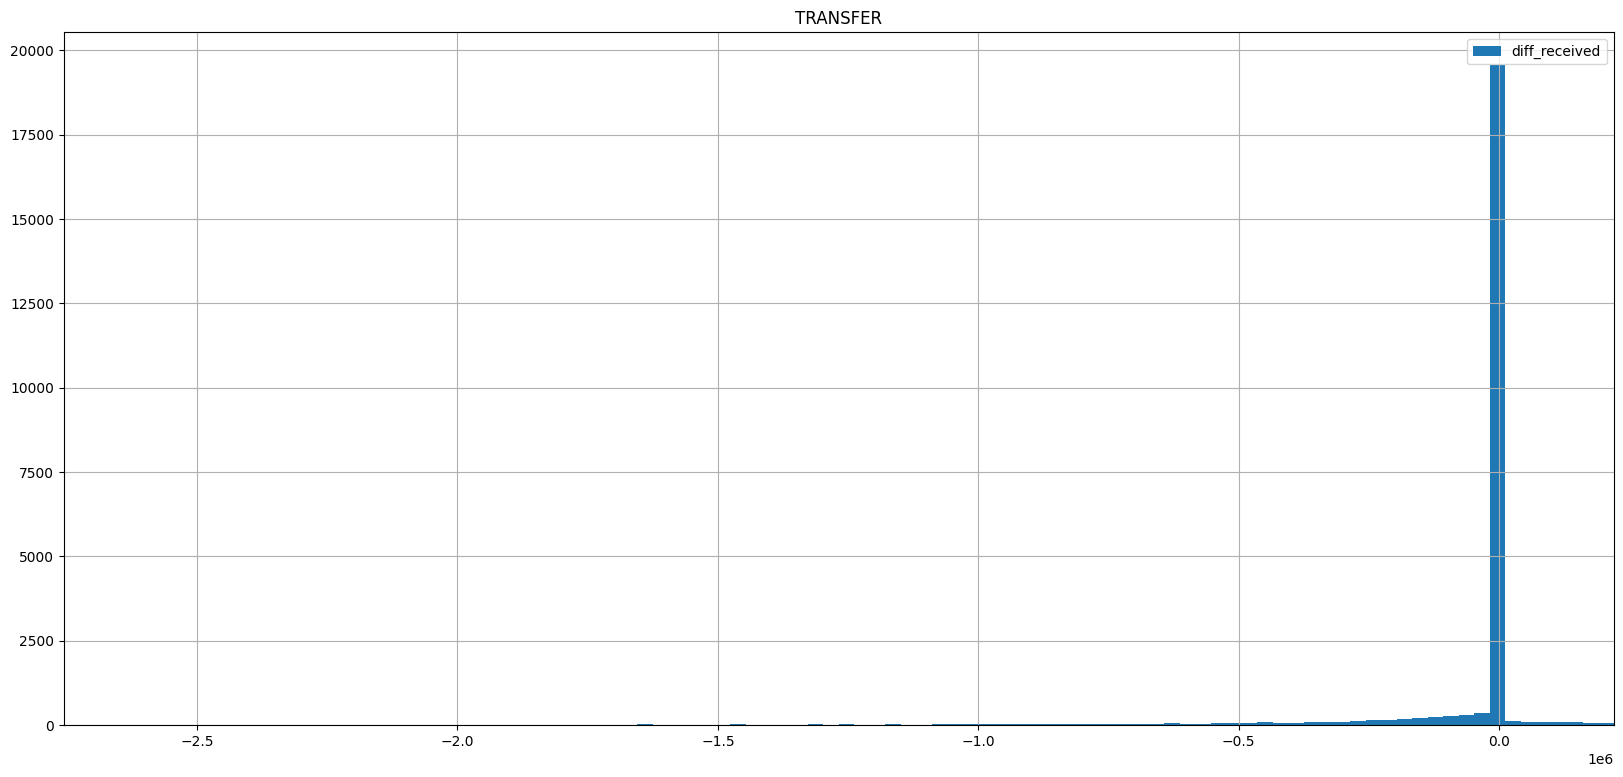

length before removing tails: 25397
length after removing tails: 24127, percent kept: 94%


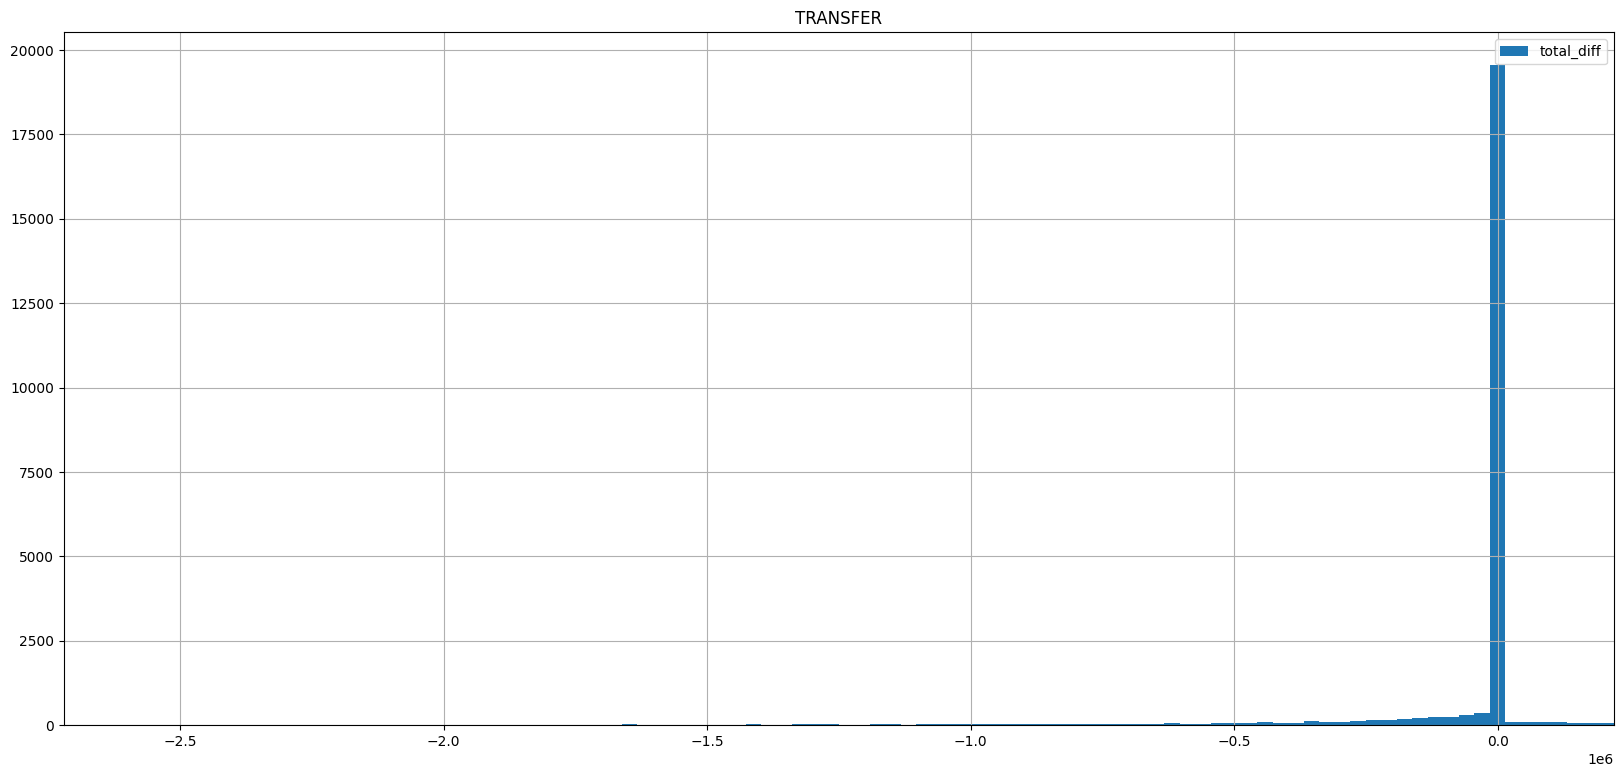

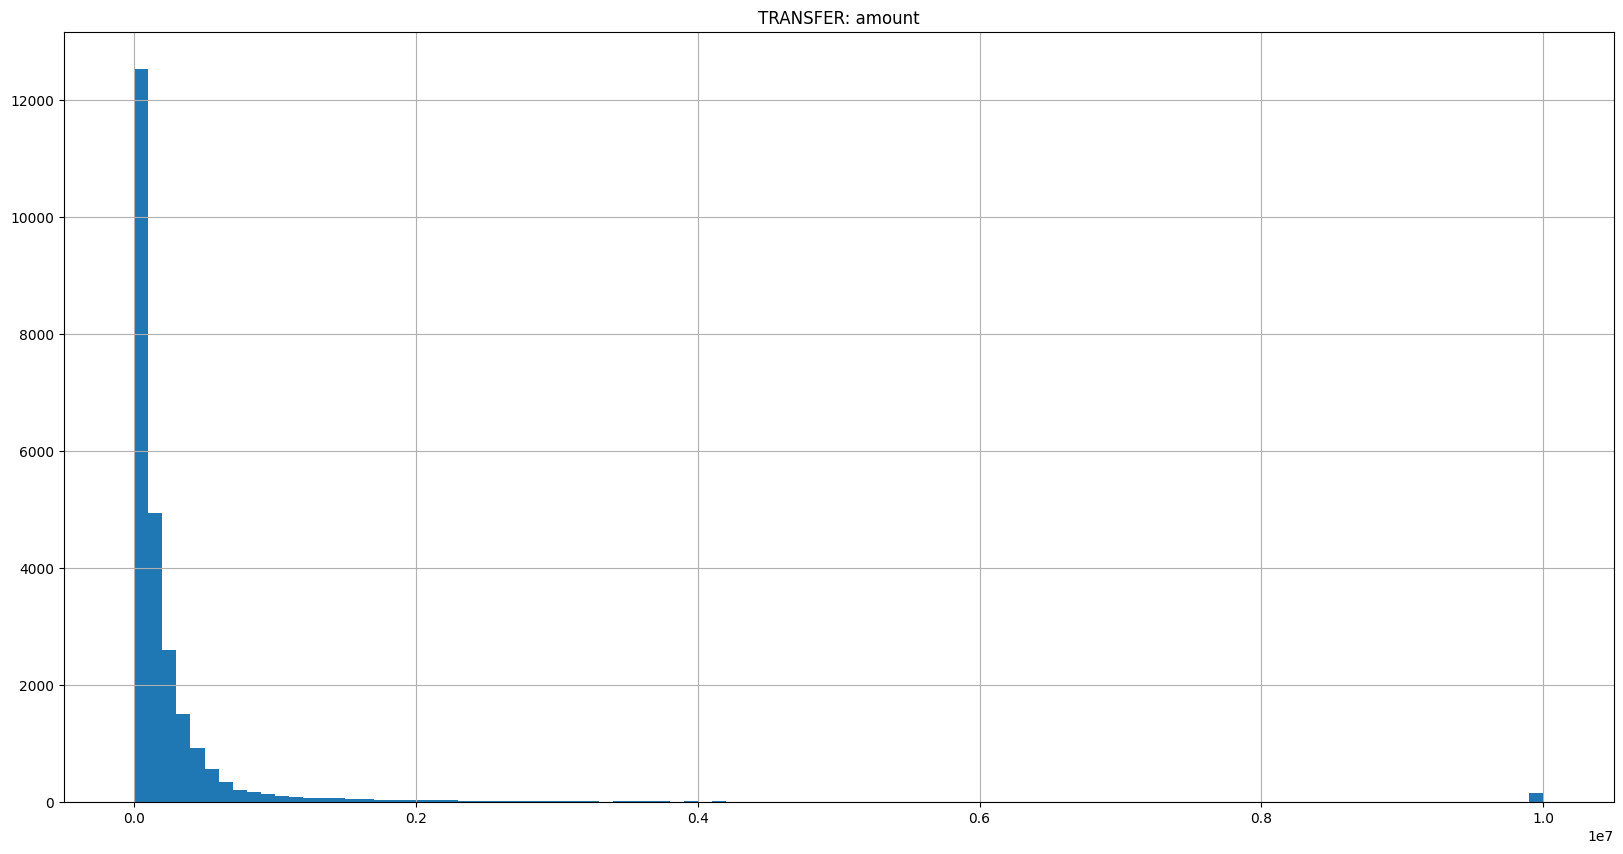

length before removing tails: 256378
length after removing tails: 256376, percent kept: 99%


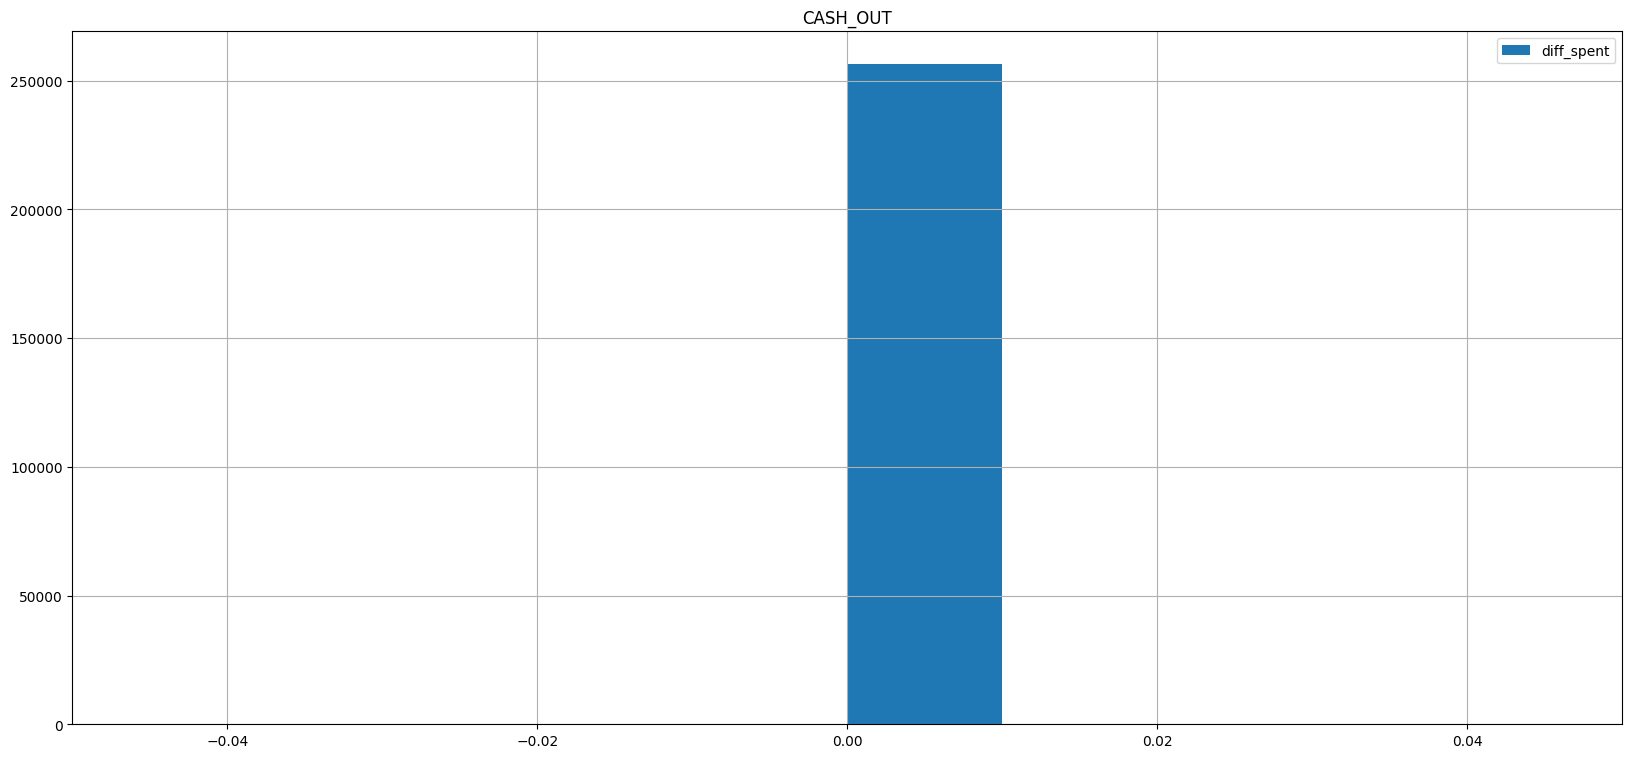

length before removing tails: 256378
length after removing tails: 243558, percent kept: 94%


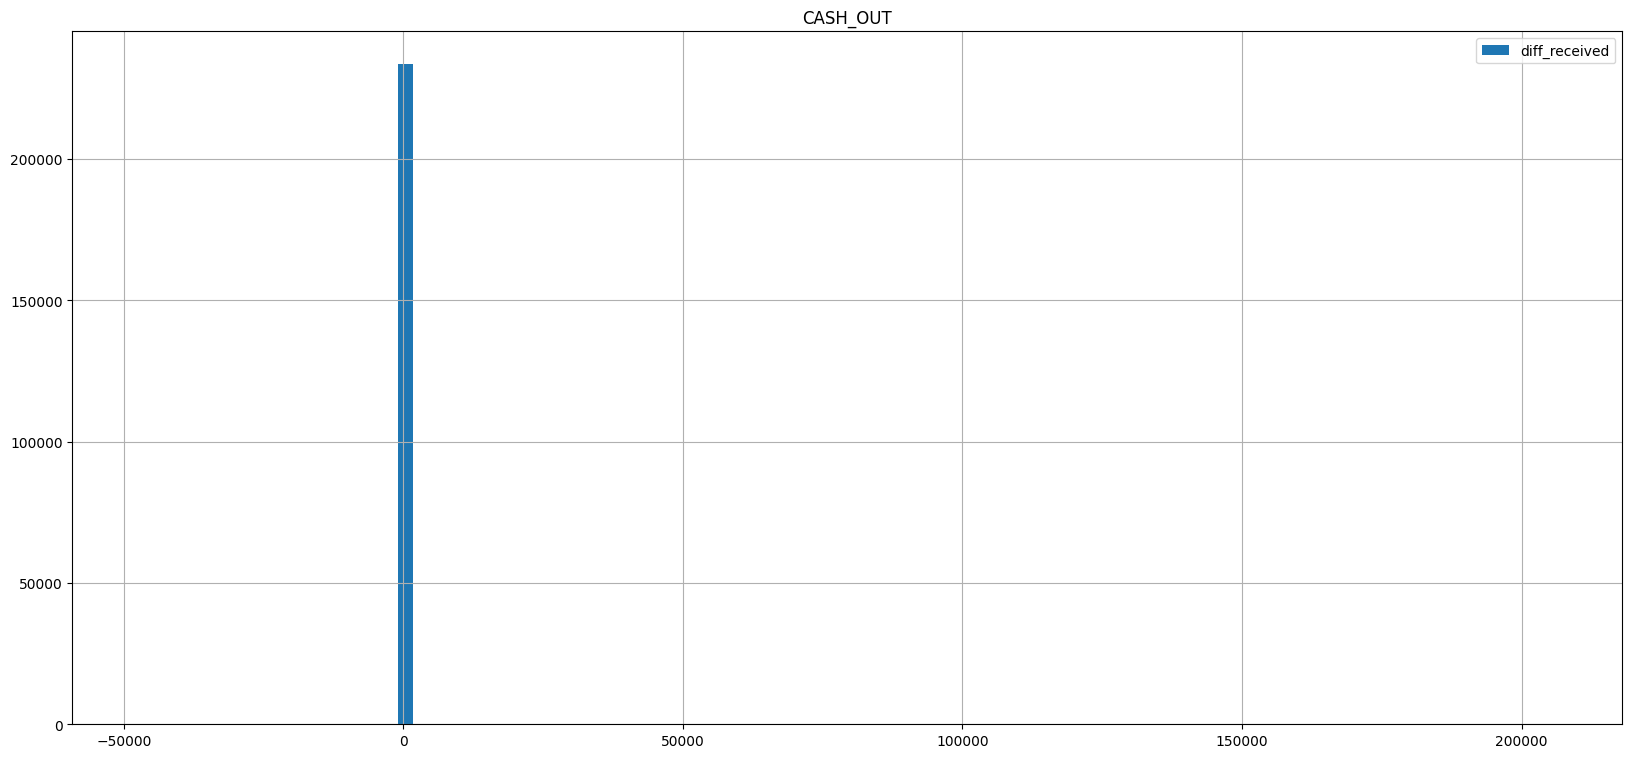

length before removing tails: 256378
length after removing tails: 243558, percent kept: 94%


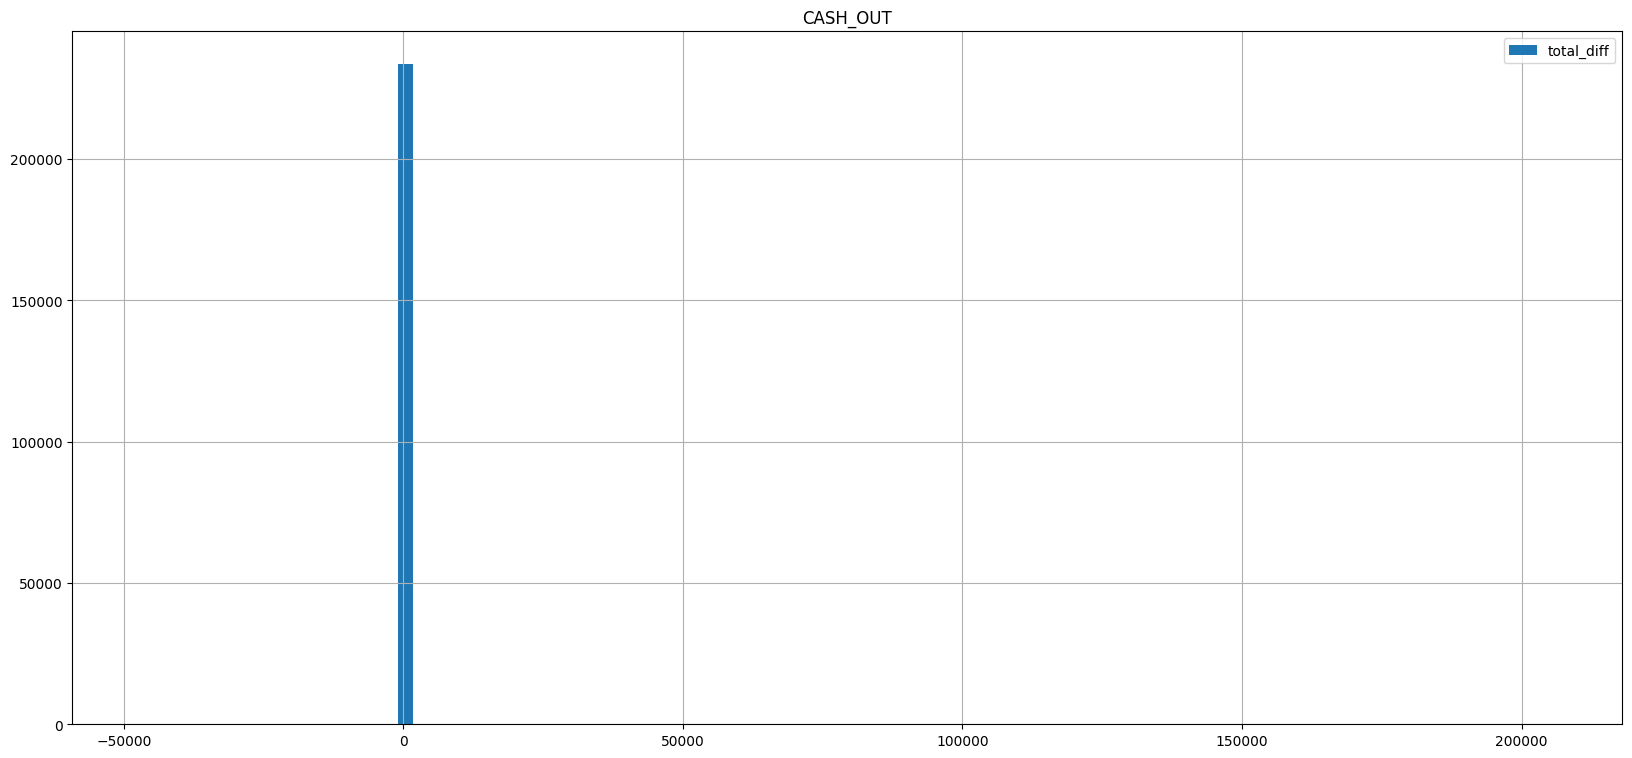

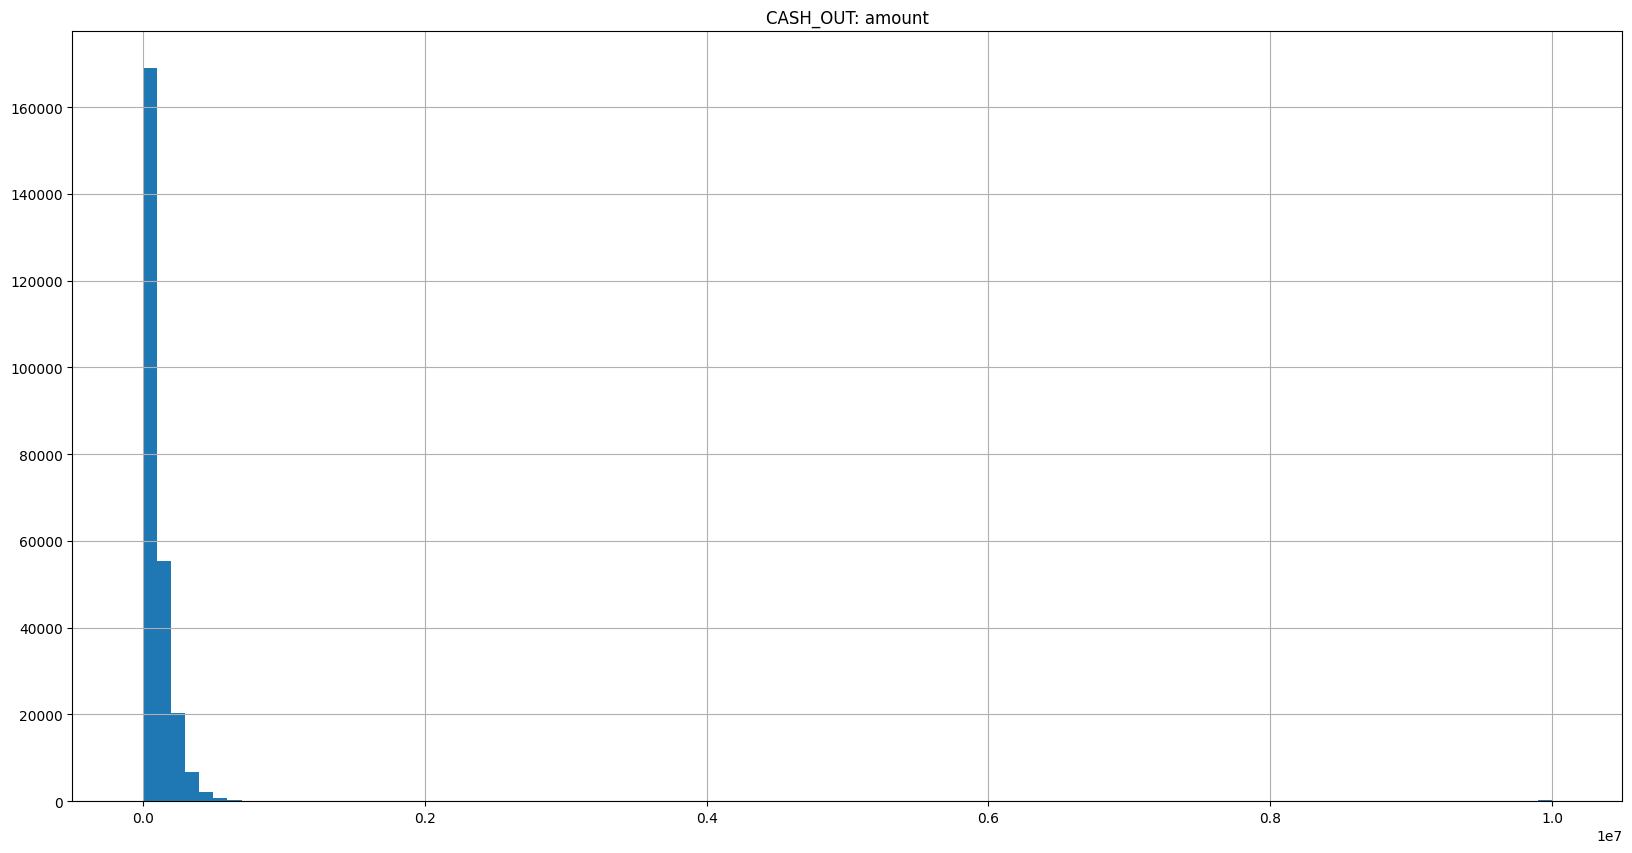

In [26]:
plot_discrepancy_histograms(alpha=0.05)

As we can see, this interval still includes some outliers. Let's remove zero values and see on the other values only.

length before removing tails: 25397
length after removing tails: 0, percent kept: 0%


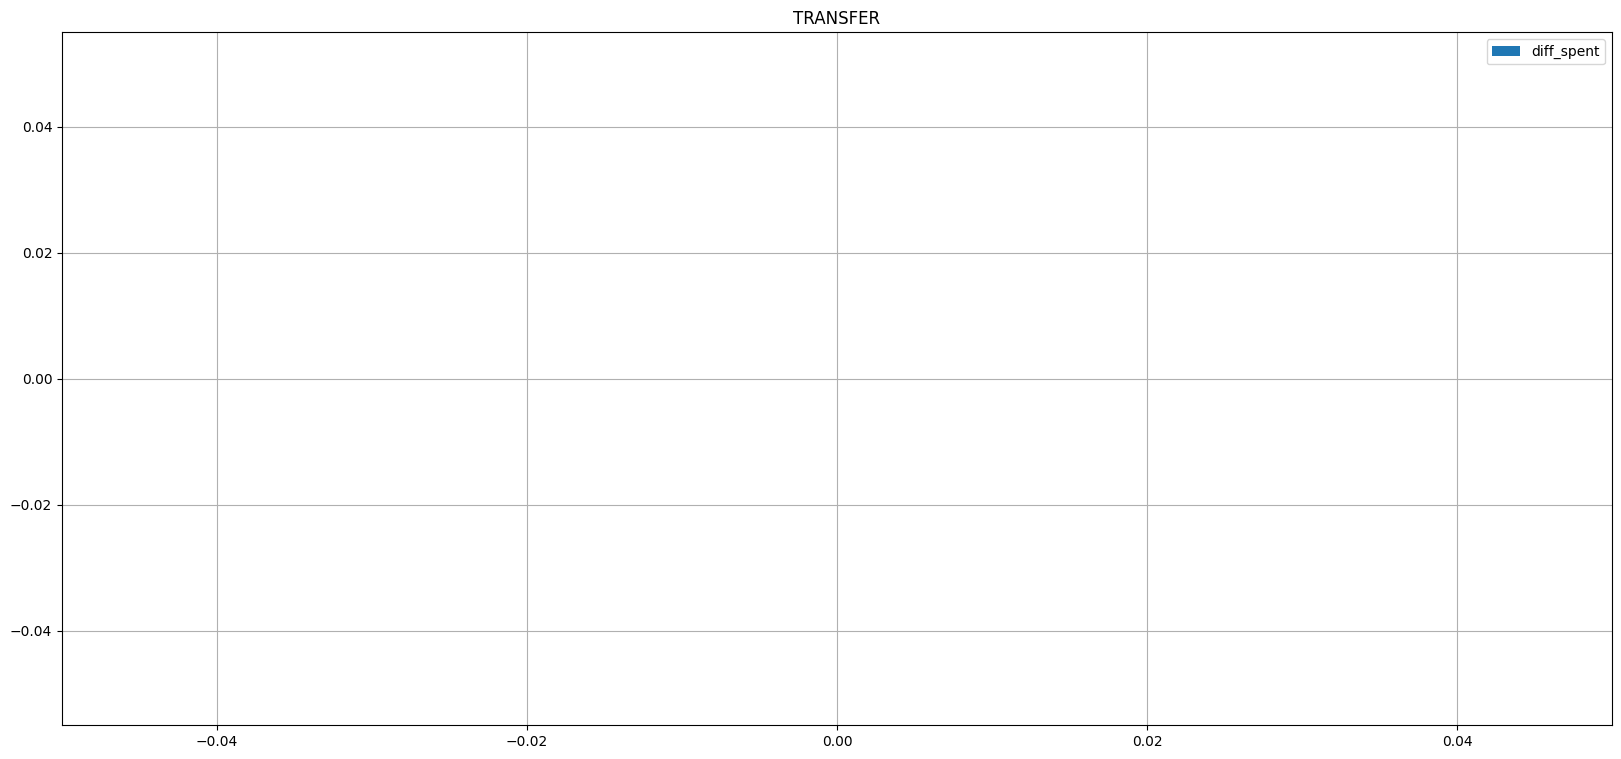

length before removing tails: 25397
length after removing tails: 4897, percent kept: 19%


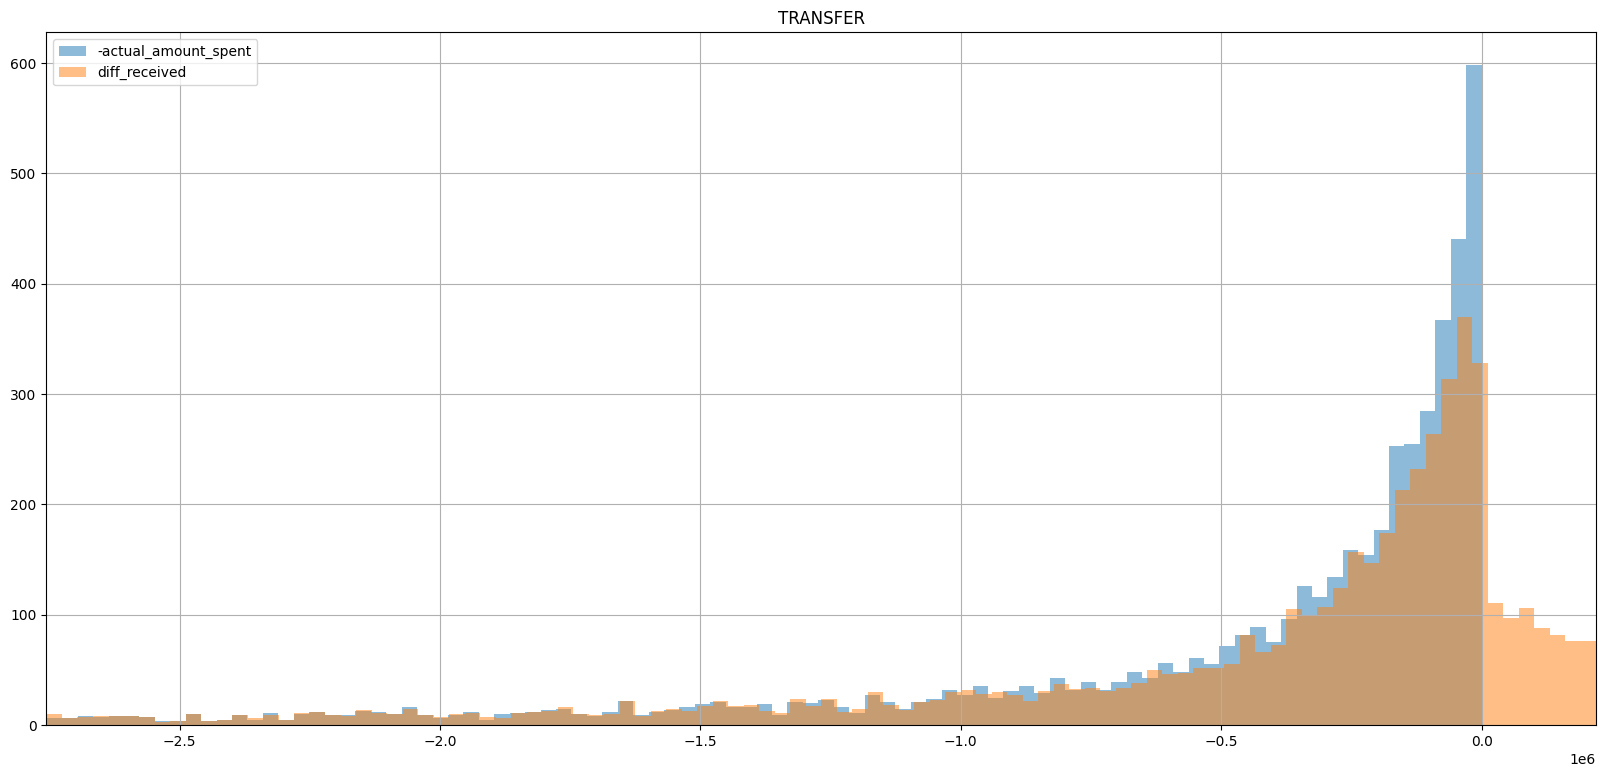

length before removing tails: 25397
length after removing tails: 4881, percent kept: 19%


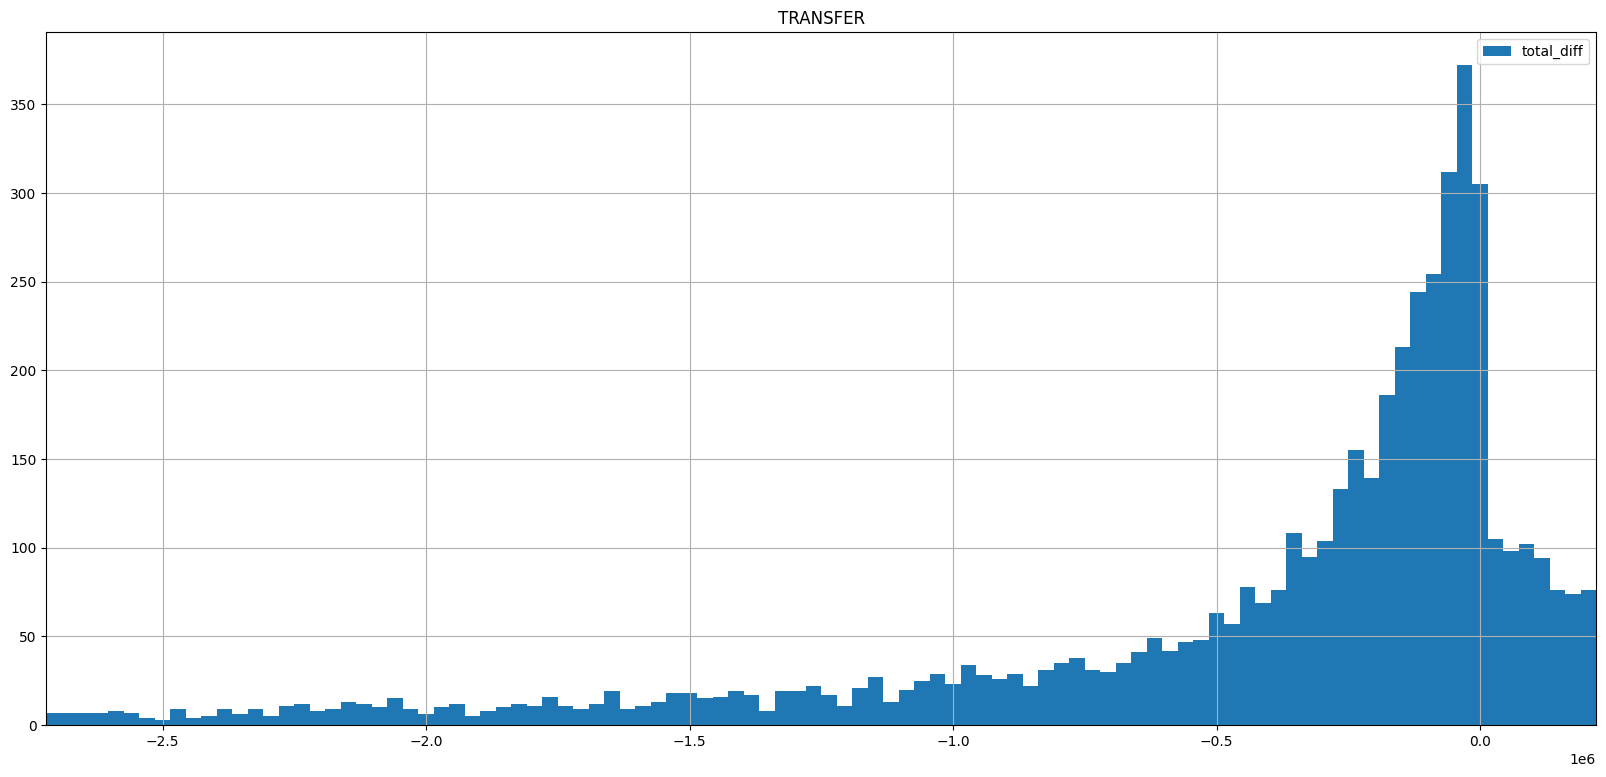

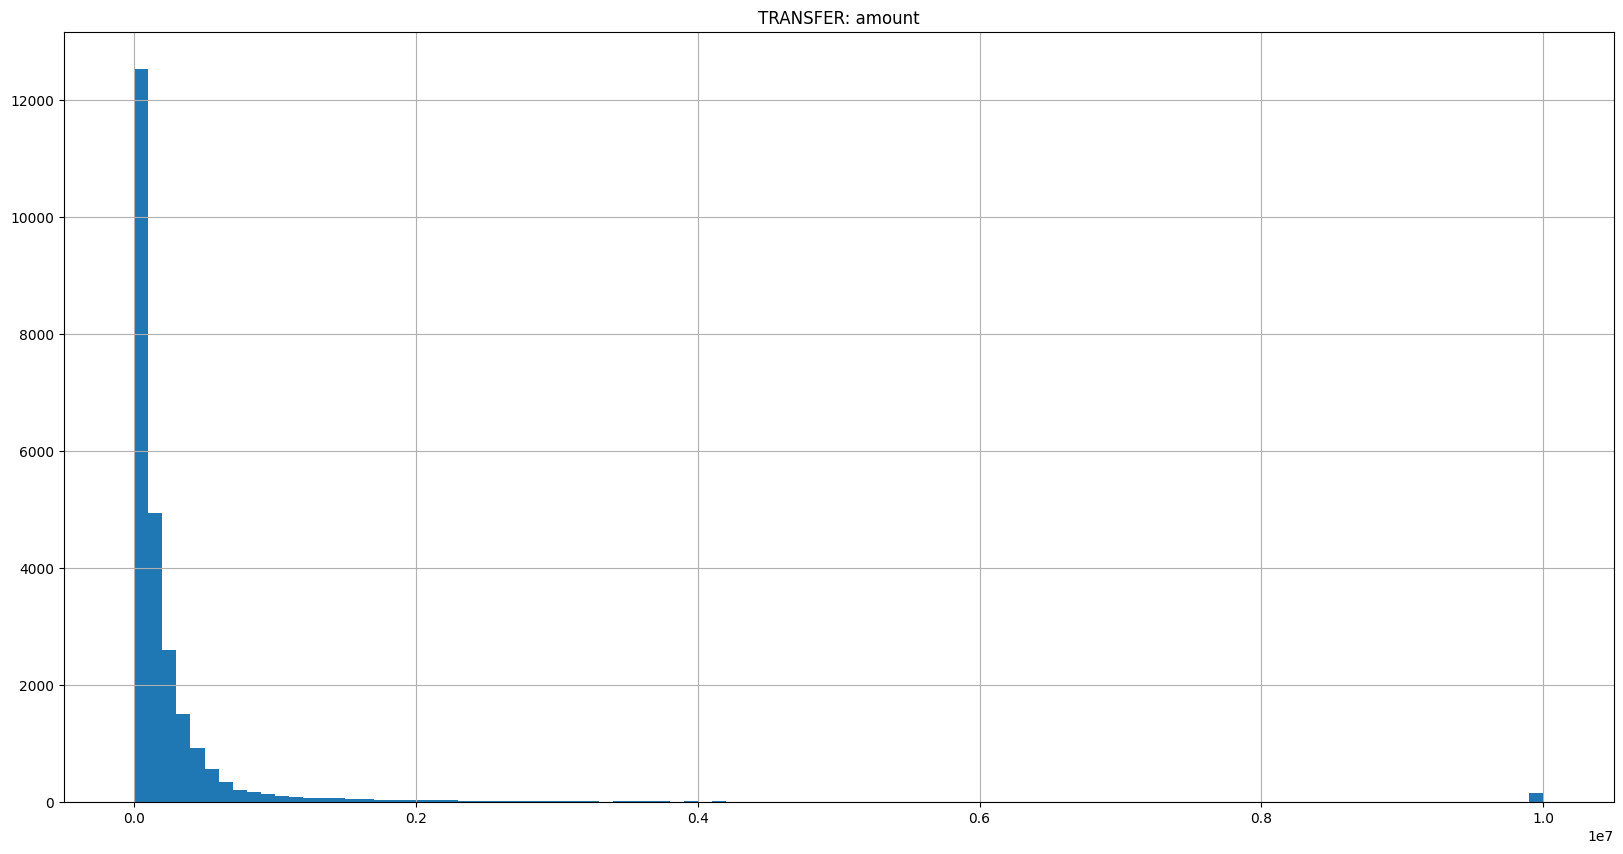

length before removing tails: 256378
length after removing tails: 0, percent kept: 0%


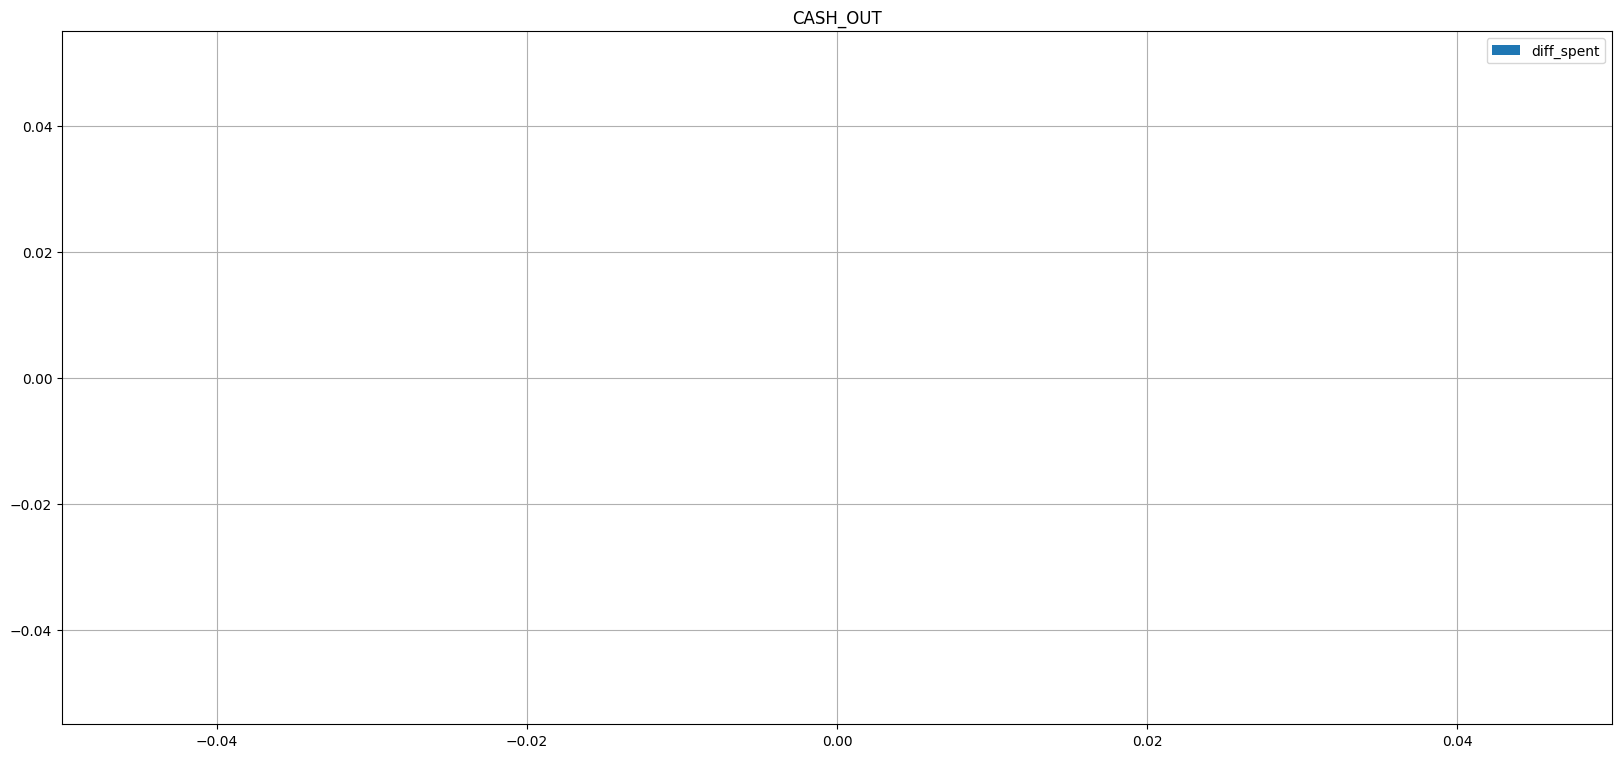

length before removing tails: 256378
length after removing tails: 10226, percent kept: 3%


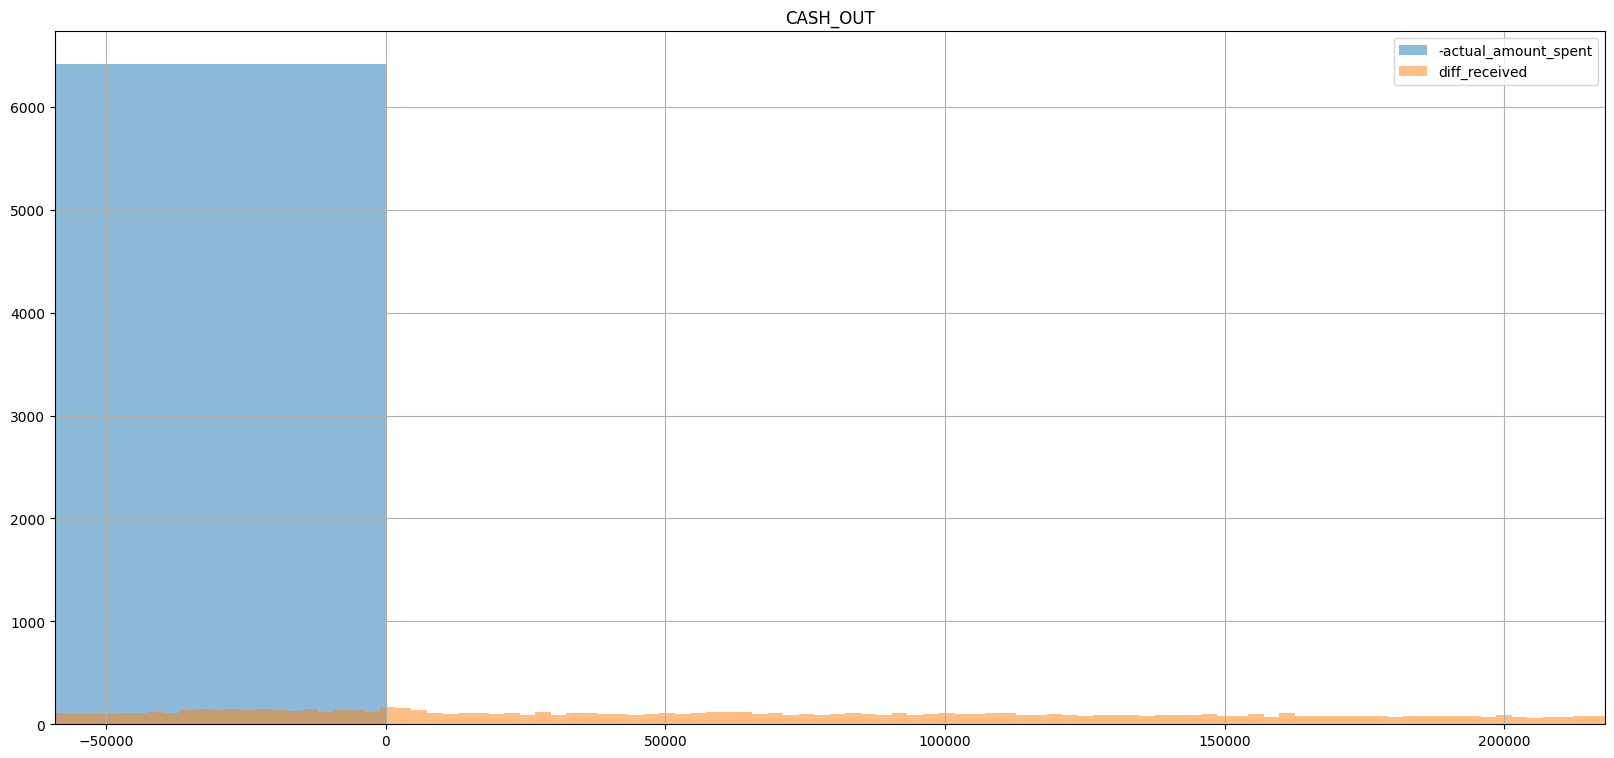

length before removing tails: 256378
length after removing tails: 10226, percent kept: 3%


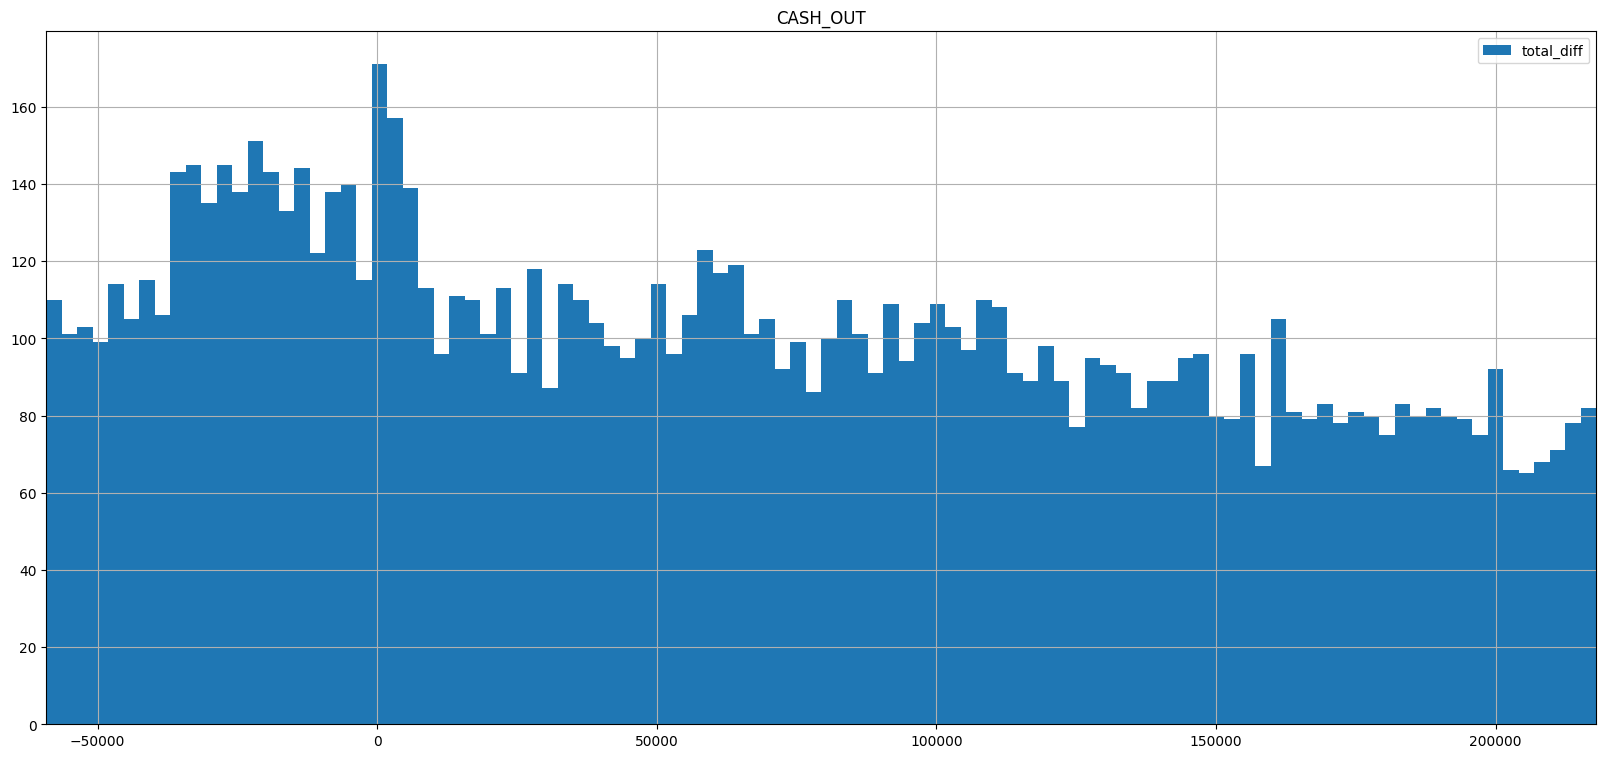

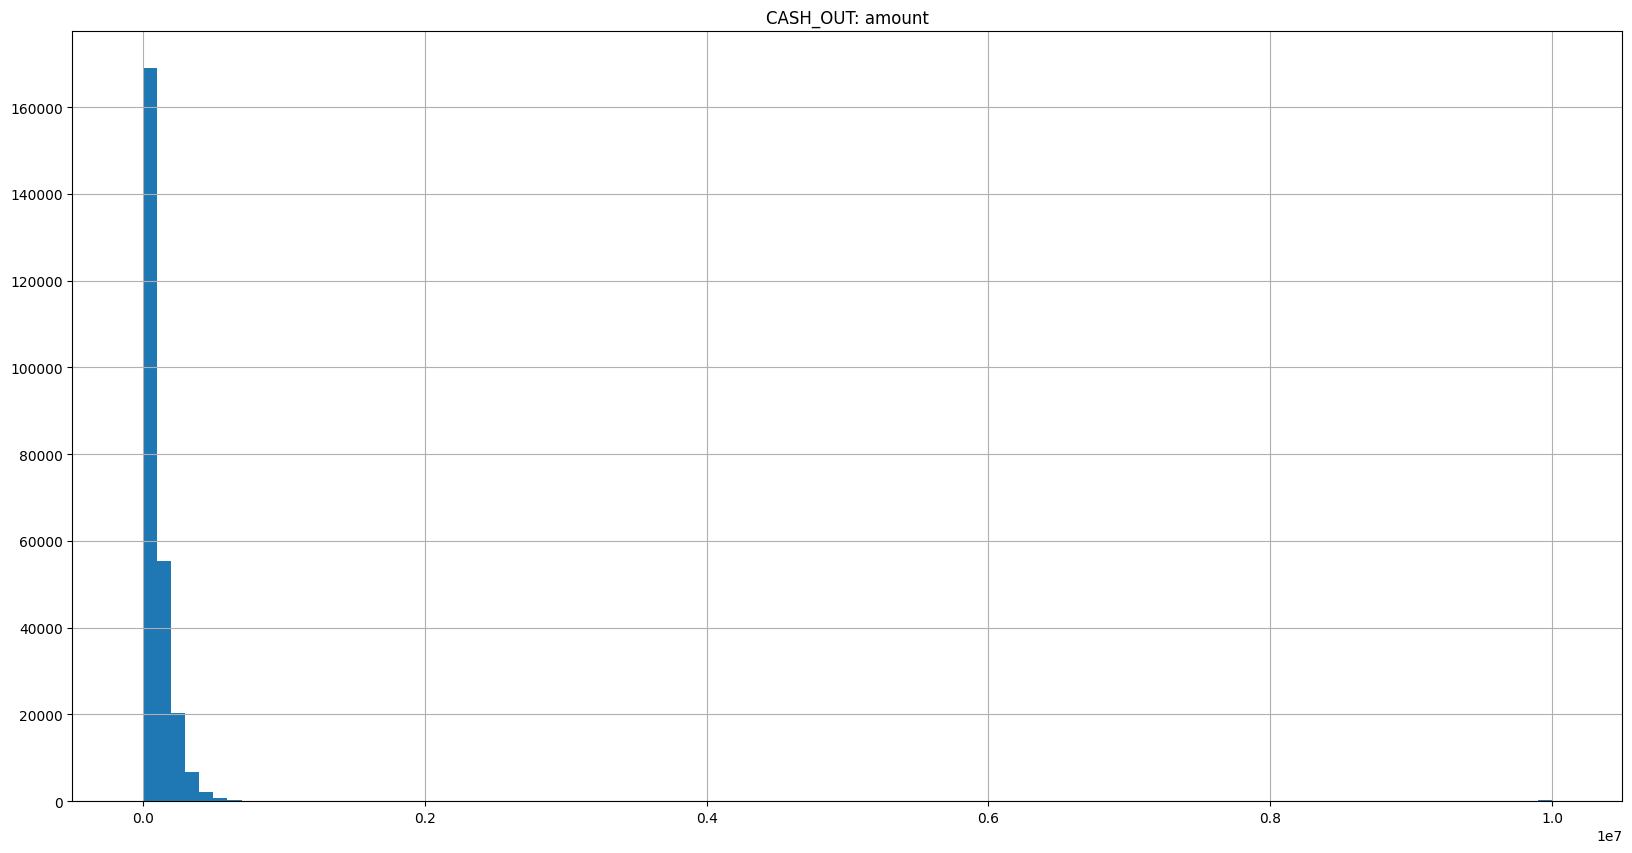

In [27]:
plot_discrepancy_histograms(
    alpha=0.05,
    remove_zero=True,
    plot_actual_amount_spent=True
)

### TRANSFER
As we can see, for transfer diff_received is almost equal to -actual_amount_spent. On the other hand, diff_spent = 0, that mean that actual_amount_spent is equal to amount. It means that in our case diff_received = actual_amount_received - amount = actual_amount_received - actual_amount_spent, but according to our plot diff_received = -actual_amount_spent, so actual_amount_received = 0, that mean that in transfer transactions money are sent, but not received in most cases.
 ### CASH OUT
 In cash out there is almost uniform distribution of total_diff, which is equal to diff_received, because diff_spent = 0. There is no explicit relationship between diff_received and actual_amount_spent, so there is no delay in receiving money. But, in fact, there is not so many cases of not zero diff_received, so, maybe, we can clean them out or just ignore.

## Less important findings

In [28]:
transactions[transactions['type'].isin(['TRANSFER', 'CASH_OUT'])].shape

(2770409, 16)

Only about 1/3 of all dataset has type of our interest.

<AxesSubplot: >

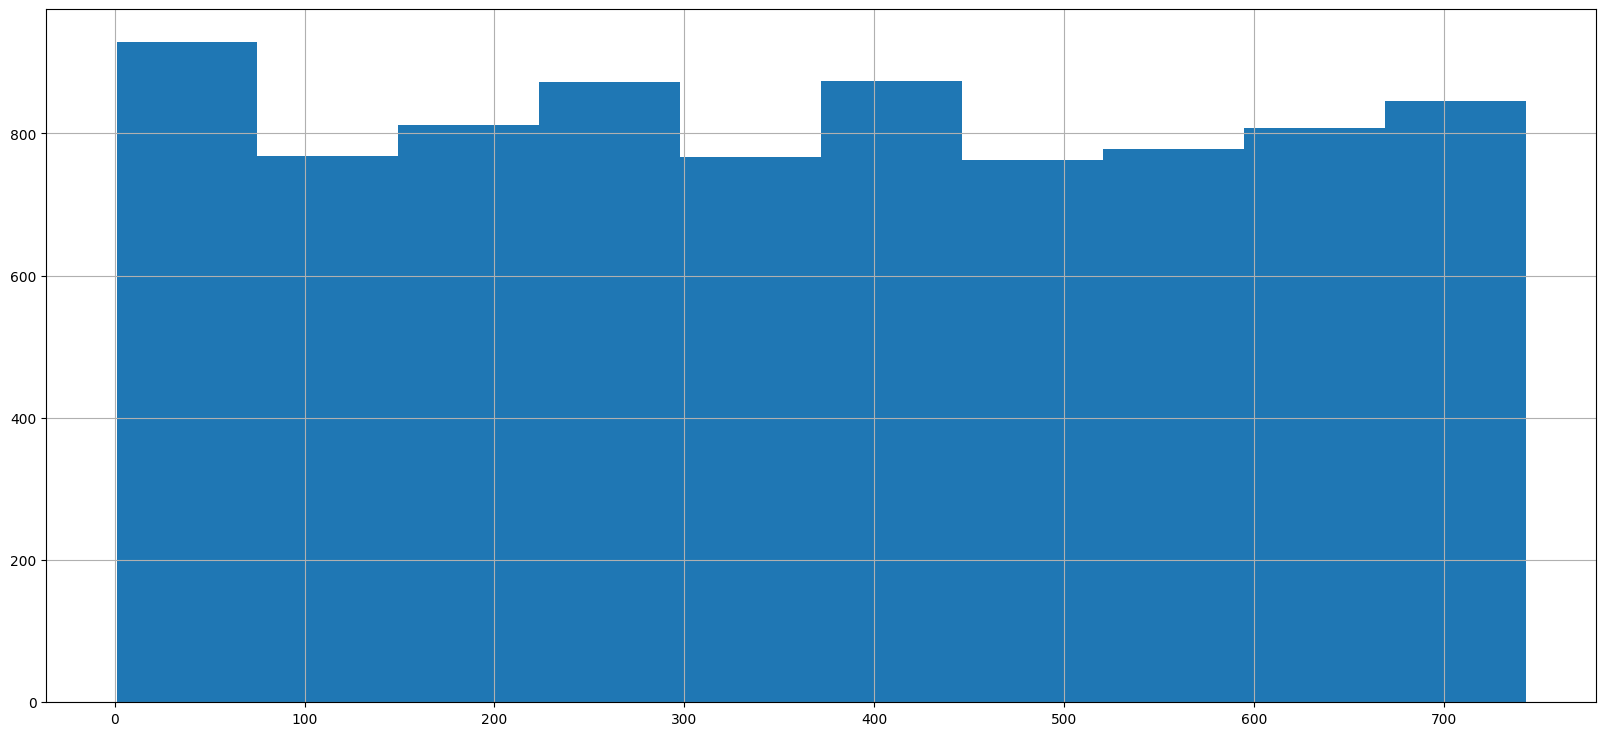

In [29]:
transactions[transactions['isFraud'] == 1]['step'].hist()

There is uniform distribution of steps, so it doesn't look like as important feature, as type of transaction is.

## Names processing

In [30]:
transactions['nameOrigFirstLetter'] = transactions['nameOrig'].str[0]
transactions['nameDestFirstLetter'] = transactions['nameDest'].str[0]

In [31]:
display_discrepancies('nameOrigFirstLetter')

'nameOrigFirstLetter'

'C'

,diff_spent,diff_received,total_diff,amount
count,6362620.00,6362620.00,6.362620e+06,6362620.00
mean,-201092.47,-55567.17,1.455253e+05,179861.90
std,606650.46,441528.77,8.012558e+05,603858.23
min,-92445516.64,-13191233.98,-1.293042e+07,0.00
25%,-249641.09,-29353.04,-1.000000e-02,13389.57
50%,-68677.26,-3500.49,0.000000e+00,74871.94
75%,-2954.23,0.00,1.435285e+05,208721.48
max,0.01,75885725.63,1.051376e+08,92445516.64


In [32]:
display_discrepancies('nameDestFirstLetter')

'nameDestFirstLetter'

'M'

,diff_spent,diff_received,total_diff,amount
count,2151495.00,2151495.00,2151495.00,2151495.00
mean,-6678.67,-13057.60,-6378.94,13057.60
std,11178.11,12556.45,9529.50,12556.45
min,-238637.98,-238637.98,-185122.54,0.02
25%,-9654.04,-17561.22,-9713.06,4383.82
50%,-380.78,-9482.19,-2135.51,9482.19
75%,0.00,-4383.82,0.00,17561.22
max,0.01,-0.02,0.00,238637.98


'C'

,diff_spent,diff_received,total_diff,amount
count,4211125.00,4211125.00,4.211125e+06,4211125.00
mean,-300419.92,-77285.63,2.231343e+05,265083.46
std,725817.47,541361.61,9.757871e+05,727589.12
min,-92445516.64,-13191233.98,-1.293042e+07,0.00
25%,-352831.33,-136382.68,0.000000e+00,76085.56
50%,-180041.83,-0.00,7.949112e+04,158943.21
75%,-70342.51,0.00,2.289475e+05,278485.01
max,0.01,75885725.63,1.051376e+08,92445516.64


As we can see, all origin account names start with C, while destination accounts can start with M or C.

In [33]:
transactions.groupby('nameOrig')['amount'].count().sort_values(ascending=False).head(10)

nameOrig
C1065307291    3
C1784010646    3
C1902386530    3
C1832548028    3
C545315117     3
C1462946854    3
C2051359467    3
C363736674     3
C1976208114    3
C1530544995    3
Name: amount, dtype: int64

In [34]:
transactions.groupby('nameDest')['amount'].count().sort_values(ascending=False).head(10)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: amount, dtype: int64

Each source has no more than 3 transactions, while there is some destinations with 100 of transactions.

# Features generation

In [35]:
transactions['has_debt'] = transactions['amount'] > transactions['oldbalanceOrg']
transactions['debt'] = (transactions['amount'] - transactions['oldbalanceOrg']) * transactions['has_debt']

In [36]:
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,actual_amount_spent,actual_amount_received,diff_spent,diff_received,total_diff,nameOrigFirstLetter,nameDestFirstLetter,has_debt,debt
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1.455192e-11,-9839.64,-9839.64,C,M,False,-0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,-1.136868e-12,-1864.28,-1864.28,C,M,False,-0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0.000000e+00,-181.00,-181.00,C,C,False,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,0.000000e+00,-21363.00,-21363.00,C,C,False,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,0.000000e+00,-11668.14,-11668.14,C,M,False,-0.0


Let's group data by destination and calculated some statistics. It can provide us with not obvious features.

In [38]:
from tqdm import tqdm
grouped_transactions = transactions.groupby('nameDest')
info_for_group = pd.DataFrame()
info_for_group['count'] = grouped_transactions['nameOrig'].count()
columns_of_interest = [
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest',
    'actual_amount_spent',
    'actual_amount_received',
    'has_debt'
]
for column in tqdm(columns_of_interest):
    info_for_group[f'mean_{column}'] = grouped_transactions[column].mean()
    info_for_group[f'median_{column}'] = grouped_transactions[column].median()

transactions = pd.merge(
    left=transactions,
    right=info_for_group.reset_index(),
    on='nameDest'
)

100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
